In [1]:
#import of required Python modules
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\dinod\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.2' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
#loading the data set into a variable from a file system
dataset_cms = pd.read_csv(r"C:\Users\dinod\OneDrive\Dokumenti\Edukacija\University of Bath\Master Thesis Uni of BATH\CMS - podaci i analiza - dataset 1\Full_CMS_dataset.csv")

C:\Users\dinod\AppData\Local\Temp\ipykernel_24380\313315181.py:2: DtypeWarning: Columns (1,8,13,15,18,20,29,31,33,35,37,39,41,43) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset_cms = pd.read_csv(r"C:\Users\dinod\OneDrive\Dokumenti\Edukacija\University of Bath\Master Thesis Uni of BATH\CMS - podaci i analiza - dataset 1\Full_CMS_dataset.csv")


In [3]:
#initial filtering of the data set
#we're taking the most important values in those two features since it will help us to be more precise later about hospital facility scores
dataset_cms_2 = dataset_cms[(dataset_cms['HCAHPS Answer Description'].str.contains('linear mean score'))|(dataset_cms['HCAHPS Answer Description'].str.contains('star rating'))]

In [4]:
#general info oabout the data set
dataset_cms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1653683 entries, 0 to 1653682
Data columns (total 44 columns):
 #   Column                                                         Non-Null Count    Dtype 
---  ------                                                         --------------    ----- 
 0   Unnamed: 0                                                     1653683 non-null  int64 
 1   Facility ID                                                    1653683 non-null  object
 2   Facility Name                                                  1653683 non-null  object
 3   Address                                                        1653683 non-null  object
 4   City                                                           1653683 non-null  object
 5   State                                                          1653683 non-null  object
 6   ZIP Code                                                       1653683 non-null  int64 
 7   County Name                                  

In [5]:
#getting to know the different values of some of the variables in more detail
print('Years - ', sorted(dataset_cms['Year'].unique()))
print('Number of USA federal states, regions and territiories data is coming from - ', dataset_cms['State'].nunique())
print('Total number of hospital facilities by ID', dataset_cms['Facility ID'].nunique())
print('Total number of rating questions - ', dataset_cms['HCAHPS Question'].nunique())

Years -  [2016, 2017, 2018, 2019, 2020]
Number of USA federal states, regions and territiories data is coming from -  56
Total number of hospital facilities by ID 8073
Total number of rating questions -  100


In [6]:
#all the different values of Patient Survey Star Rating feature
print('Patient survey star rating feature values - ', sorted(list(dataset_cms['Patient Survey Star Rating'].unique())))

Patient survey star rating feature values -  ['1', '2', '3', '4', '5', 'Not Applicable', 'Not Available']


In [7]:
#all the different values of Hospital overall rating feature
print('Hospital overall rating feature values - ', sorted(list(dataset_cms['Hospital overall rating'].unique())))

Hospital overall rating feature values -  ['1', '2', '3', '4', '5', 'Not Available']


In [8]:
#all the different values of HCAHPS Linear Mean Value feature
print('HCAHPS Linear Mean Value feature values - ', list(dataset_cms['HCAHPS Linear Mean Value'].unique()))

HCAHPS Linear Mean Value feature values -  ['Not Applicable', '84', '90', '92', '79', '86', '89', '82', '88', '83', '91', '95', '87', '94', '75', '80', '85', '81', 'Not Available', '93', '77', '76', '78', '71', '73', '98', '96', '97', '65', '74', '72', '68', '70', '69', '99', '67', '66', '60', '64', '62', '56', '59', '58', '63', '61', '100', '57', '55', '53']


In [9]:
#all the different values for a group of indicators which show national comparisons
print('National comparison indicators values - ', sorted(dataset_cms['Mortality national comparison'].unique()))

National comparison indicators values -  ['Above the National average', 'Above the national average', 'Below the National average', 'Below the national average', 'Not Available', 'Same as the National average', 'Same as the national average']


In [10]:
#grouping data by hospital, state and city
#descending series by hospital that has the highest rating of 5 on all HCAHPS questions and is rated with a 5 on the overall rating
#Patient Survey Star Rating and Hospital overall rating are not the same measure, the hospital overall rating is an aggregate measure of the hospital's performance
#for hospitals that have a score of 5 on 12, 11 or 10 questions, we can say that they belong to the top 3 groups of hospitals for 2016
best_hospitals_2016 = dataset_cms_2[(dataset_cms_2['Year'] == 2016) & (dataset_cms_2['Patient Survey Star Rating'] == '5') & (dataset_cms_2['Hospital overall rating'] == '5')][['Facility Name', 'State', 'City', 'Year', 'HCAHPS Question']].groupby(by=['Facility Name', 'State', 'City', 'Year']).nunique().sort_values(by=['HCAHPS Question'], ascending=False).head(9)
dataset_cms_2[(dataset_cms_2['Year'] == 2016) & (dataset_cms_2['Patient Survey Star Rating'] == '5') & (dataset_cms_2['Hospital overall rating'] == '5')][['Facility Name', 'State', 'City', 'Year', 'HCAHPS Question']].groupby(by=['Facility Name', 'State', 'City', 'Year']).nunique().sort_values(by=['HCAHPS Question'], ascending=False).head(9)

,,,,HCAHPS Question
Facility Name,State,City,Year,
SURGICAL HOSPITAL AT SOUTHWOODS,OH,YOUNGSTOWN,2016,12
"OKLAHOMA HEART HOSPITAL, LLC",OK,OKLAHOMA CITY,2016,12
SAUK PRAIRIE HOSPITAL,WI,PRAIRIE DU SAC,2016,11
UHHS MEMORIAL HOSPITAL OF GENEVA,OH,GENEVA,2016,11
IOWA SPECIALTY HOSPITAL - BELMOND,IA,BELMOND,2016,11
NEBRASKA ORTHOPAEDIC HOSPITAL,NE,OMAHA,2016,11
MARION REGIONAL MEDICAL CENTER,AL,HAMILTON,2016,10
HILL COUNTRY MEMORIAL HOSPITAL INC,TX,FREDERICKSBURG,2016,10
GHS PATEWOOD MEMORIAL HOSPITAL,SC,GREENVILLE,2016,10


In [11]:
#grouping data by hospital, state and city
#descending series by hospital that has the highest rating of 5 on all HCAHPS questions and is rated with a 5 on the overall rating
#for hospitals that have a score of 5 on 12, 11 or 10 questions, we can say that they belong to the top 3 groups of hospitals for 2017
best_hospitals_2017 = dataset_cms_2[(dataset_cms_2['Year'] == 2017) & (dataset_cms_2['Patient Survey Star Rating'] == '5') & (dataset_cms_2['Hospital overall rating'] == '5')][['Facility Name', 'State', 'City', 'Year', 'HCAHPS Question']].groupby(by=['Facility Name', 'State', 'City', 'Year']).nunique().sort_values(by=['HCAHPS Question'], ascending=False).head(10)
dataset_cms_2[(dataset_cms_2['Year'] == 2017) & (dataset_cms_2['Patient Survey Star Rating'] == '5') & (dataset_cms_2['Hospital overall rating'] == '5')][['Facility Name', 'State', 'City', 'Year', 'HCAHPS Question']].groupby(by=['Facility Name', 'State', 'City', 'Year']).nunique().sort_values(by=['HCAHPS Question'], ascending=False).head(10)

,,,,HCAHPS Question
Facility Name,State,City,Year,
"OKLAHOMA HEART HOSPITAL, LLC",OK,OKLAHOMA CITY,2017,12
SURGICAL HOSPITAL AT SOUTHWOODS,OH,YOUNGSTOWN,2017,12
UHHS MEMORIAL HOSPITAL OF GENEVA,OH,GENEVA,2017,11
ST JOSEPH MERCY CHELSEA,MI,CHELSEA,2017,11
SAUK PRAIRIE HOSPITAL,WI,PRAIRIE DU SAC,2017,11
GHS PATEWOOD MEMORIAL HOSPITAL,SC,GREENVILLE,2017,11
NEBRASKA ORTHOPAEDIC HOSPITAL,NE,OMAHA,2017,11
IOWA SPECIALTY HOSPITAL - BELMOND,IA,BELMOND,2017,11
AVERA HEART HOSPITAL OF SOUTH DAKOTA,SD,SIOUX FALLS,2017,10


In [12]:
#grouping data by hospital, state and city
#descending series by hospital that has the highest rating of 5 on all HCAHPS questions and is rated with a 5 on the overall rating
#for hospitals that have a score of 5 on 12, 11 or 10 questions, we can say that they belong to the top 3 groups of hospitals for 2018
best_hospitals_2018 = dataset_cms_2[(dataset_cms_2['Year'] == 2018) & (dataset_cms_2['Patient Survey Star Rating'] == '5') & (dataset_cms_2['Hospital overall rating'] == '5')][['Facility Name', 'State', 'City', 'Year', 'HCAHPS Question']].groupby(by=['Facility Name', 'State', 'City', 'Year']).nunique().sort_values(by=['HCAHPS Question'], ascending=False).head(36)
dataset_cms_2[(dataset_cms_2['Year'] == 2018) & (dataset_cms_2['Patient Survey Star Rating'] == '5') & (dataset_cms_2['Hospital overall rating'] == '5')][['Facility Name', 'State', 'City', 'Year', 'HCAHPS Question']].groupby(by=['Facility Name', 'State', 'City', 'Year']).nunique().sort_values(by=['HCAHPS Question'], ascending=False).head(36)

,,,,HCAHPS Question
Facility Name,State,City,Year,
MANHATTAN SURGICAL HOSPITAL LLC,KS,MANHATTAN,2018,11
OKLAHOMA CENTER FOR ORTHOPAEDIC & MULTI-SP,OK,OKLAHOMA CITY,2018,11
ST JOSEPHS HOSPITAL,IL,BREESE,2018,11
CENTRAL LOUISIANA SURGICAL HOSPITAL,LA,ALEXANDRIA,2018,11
SURGICAL HOSPITAL AT SOUTHWOODS,OH,YOUNGSTOWN,2018,11
SUGAR LAND SURGICAL HOSPITAL LLP,TX,SUGAR LAND,2018,11
FRANCISCAN HEALTH CARMEL,IN,CARMEL,2018,11
SURGICAL INSTITUTE OF READING,PA,WYOMISSING,2018,11
MIDWESTERN REGION MED CENTER,IL,ZION,2018,10


In [13]:
#grouping data by hospital, state and city
#descending series by hospital that has the highest rating of 5 on all HCAHPS questions and is rated with a 5 on the overall rating
#for hospitals that have a score of 5 on 12, 11 or 10 questions, we can say that they belong to the top 3 groups of hospitals for 2019
best_hospitals_2019 = dataset_cms_2[(dataset_cms_2['Year'] == 2019) & (dataset_cms_2['Patient Survey Star Rating'] == '5') & (dataset_cms_2['Hospital overall rating'] == '5')][['Facility Name', 'State', 'City', 'Year', 'HCAHPS Question']].groupby(by=['Facility Name', 'State', 'City', 'Year']).nunique().sort_values(by=['HCAHPS Question'], ascending=False).head(28)
dataset_cms_2[(dataset_cms_2['Year'] == 2019) & (dataset_cms_2['Patient Survey Star Rating'] == '5') & (dataset_cms_2['Hospital overall rating'] == '5')][['Facility Name', 'State', 'City', 'Year', 'HCAHPS Question']].groupby(by=['Facility Name', 'State', 'City', 'Year']).nunique().sort_values(by=['HCAHPS Question'], ascending=False).head(28)

,,,,HCAHPS Question
Facility Name,State,City,Year,
SACRED HEART HOSPITAL ON THE GULF,FL,PORT SAINT JOE,2019,11
OAKLEAF SURGICAL HOSPITAL,WI,ALTOONA,2019,11
STOUGHTON HOSPITAL,WI,STOUGHTON,2019,11
SURGICAL HOSPITAL AT SOUTHWOODS,OH,YOUNGSTOWN,2019,11
SURGICAL INSTITUTE OF READING,PA,WYOMISSING,2019,11
ST JOSEPH'S HOSPITAL,IL,HIGHLAND,2019,11
FRANCISCAN HEALTH CARMEL,IN,CARMEL,2019,11
MIDWESTERN REGION MED CENTER,IL,ZION,2019,11
SAUK PRAIRIE HOSPITAL,WI,PRAIRIE DU SAC,2019,11


In [14]:
#grouping data by hospital, state and city
#descending series by hospital that has the highest rating of 5 on all HCAHPS questions and is rated with a 5 on the overall rating
#for hospitals that have a score of 5 on 12, 11 or 10 questions, we can say that they belong to the top 3 groups of hospitals for 2020
best_hospitals_2020 = dataset_cms_2[(dataset_cms_2['Year'] == 2020) & (dataset_cms_2['Patient Survey Star Rating'] == '5') & (dataset_cms_2['Hospital overall rating'] == '5')][['Facility Name', 'State', 'City', 'Year', 'HCAHPS Question']].groupby(by=['Facility Name', 'State', 'City', 'Year']).nunique().sort_values(by=['HCAHPS Question'], ascending=False).head(23)
dataset_cms_2[(dataset_cms_2['Year'] == 2020) & (dataset_cms_2['Patient Survey Star Rating'] == '5') & (dataset_cms_2['Hospital overall rating'] == '5')][['Facility Name', 'State', 'City', 'Year', 'HCAHPS Question']].groupby(by=['Facility Name', 'State', 'City', 'Year']).nunique().sort_values(by=['HCAHPS Question'], ascending=False).head(23)

,,,,HCAHPS Question
Facility Name,State,City,Year,
SOUTHWESTERN REGIONAL MEDICAL CENTER,OK,TULSA,2020,11
SAUK PRAIRIE HOSPITAL,WI,PRAIRIE DU SAC,2020,11
SOUTHWEST HEALTH CENTER,WI,PLATTEVILLE,2020,11
PERHAM HEALTH,MN,PERHAM,2020,11
WABASH GENERAL HOSPITAL 1,IL,MOUNT CARMEL,2020,11
SURGICAL HOSPITAL AT SOUTHWOODS,OH,YOUNGSTOWN,2020,10
NORTHERN MAINE MEDICAL CENTER,ME,FORT KENT,2020,10
"OKLAHOMA HEART HOSPITAL SOUTH, LLC",OK,OKLAHOMA CITY,2020,10
"OKLAHOMA HEART HOSPITAL, LLC",OK,OKLAHOMA CITY,2020,10


In [15]:
#grouping data by hospital, state and city
#descending series by hospital that has the highest number of ratings of 1 on HCAHPS questions and is rated 1 on the overall rating
#a score of 1 in this data set represents the worst possible score
#for the first 3 groups of hospitals from this series, we can say that they are the worst hospitals from 2016
worst_hospitals_2016 = dataset_cms_2[(dataset_cms_2['Year'] == 2016) & (dataset_cms_2['Patient Survey Star Rating'] == '1') & (dataset_cms_2['Hospital overall rating'] == '1')][['Facility Name', 'State', 'City', 'Year', 'HCAHPS Question']].groupby(by=['Facility Name', 'State', 'City', 'Year']).nunique().sort_values(by=['HCAHPS Question'], ascending=False).head(10)
dataset_cms_2[(dataset_cms_2['Year'] == 2016) & (dataset_cms_2['Patient Survey Star Rating'] == '1') & (dataset_cms_2['Hospital overall rating'] == '1')][['Facility Name', 'State', 'City', 'Year', 'HCAHPS Question']].groupby(by=['Facility Name', 'State', 'City', 'Year']).nunique().sort_values(by=['HCAHPS Question'], ascending=False).head(10)

,,,,HCAHPS Question
Facility Name,State,City,Year,
JACKSON PARK HOSPITAL,IL,CHICAGO,2016,12
UNIVERSITY MEDICAL CENTER,NV,LAS VEGAS,2016,12
NASSAU UNIVERSITY MEDICAL CENTER,NY,EAST MEADOW,2016,12
HEMET VALLEY MEDICAL CENTER,CA,HEMET,2016,12
ST JOHN'S EPISCOPAL HOSPITAL AT SOUTH SHORE,NY,FAR ROCKAWAY,2016,11
BROOKDALE HOSPITAL MEDICAL CENTER,NY,BROOKLYN,2016,11
ST JOSEPH'S MEDICAL CENTER,NY,YONKERS,2016,11
UNITED MEDICAL CENTER,DC,WASHINGTON,2016,11
KERN MEDICAL CENTER,CA,BAKERSFIELD,2016,10


In [16]:
#grouping data by hospital, state and city
#descending series by hospital that has the highest number of ratings of 1 on HCAHPS questions and is rated 1 on the overall rating
#for the first 3 groups of hospitals from this series, we can say that they are the worst hospitals from 2017
worst_hospitals_2017 = dataset_cms_2[(dataset_cms_2['Year'] == 2017) & (dataset_cms_2['Patient Survey Star Rating'] == '1') & (dataset_cms_2['Hospital overall rating'] == '1')][['Facility Name', 'State', 'City', 'Year', 'HCAHPS Question']].groupby(by=['Facility Name', 'State', 'City', 'Year']).nunique().sort_values(by=['HCAHPS Question'], ascending=False).head(9)
dataset_cms_2[(dataset_cms_2['Year'] == 2017) & (dataset_cms_2['Patient Survey Star Rating'] == '1') & (dataset_cms_2['Hospital overall rating'] == '1')][['Facility Name', 'State', 'City', 'Year', 'HCAHPS Question']].groupby(by=['Facility Name', 'State', 'City', 'Year']).nunique().sort_values(by=['HCAHPS Question'], ascending=False).head(9)

,,,,HCAHPS Question
Facility Name,State,City,Year,
NASSAU UNIVERSITY MEDICAL CENTER,NY,EAST MEADOW,2017,12
JACKSON PARK HOSPITAL,IL,CHICAGO,2017,12
BROOKDALE HOSPITAL MEDICAL CENTER,NY,BROOKLYN,2017,11
INTERFAITH MEDICAL CENTER,NY,BROOKLYN,2017,11
UNIVERSITY MEDICAL CENTER,NV,LAS VEGAS,2017,10
UNITED MEDICAL CENTER,DC,WASHINGTON,2017,10
TULARE REGIONAL MEDICAL CENTER,CA,TULARE,2017,10
ELMHURST HOSPITAL CENTER,NY,ELMHURST,2017,10
HEMET VALLEY MEDICAL CENTER,CA,HEMET,2017,10


In [17]:
#grouping data by hospital, state and city
#descending series by hospital that has the highest number of ratings of 1 on HCAHPS questions and is rated 1 on the overall rating
#for the first 3 groups of hospitals from this series, we can say that they are the worst hospitals from 2018
worst_hospitals_2018 = dataset_cms_2[(dataset_cms_2['Year'] == 2018) & (dataset_cms_2['Patient Survey Star Rating'] == '1') & (dataset_cms_2['Hospital overall rating'] == '1')][['Facility Name', 'State', 'City', 'Year', 'HCAHPS Question']].groupby(by=['Facility Name', 'State', 'City', 'Year']).nunique().sort_values(by=['HCAHPS Question'], ascending=False).head(27)
dataset_cms_2[(dataset_cms_2['Year'] == 2018) & (dataset_cms_2['Patient Survey Star Rating'] == '1') & (dataset_cms_2['Hospital overall rating'] == '1')][['Facility Name', 'State', 'City', 'Year', 'HCAHPS Question']].groupby(by=['Facility Name', 'State', 'City', 'Year']).nunique().sort_values(by=['HCAHPS Question'], ascending=False).head(27)

,,,,HCAHPS Question
Facility Name,State,City,Year,
MEMORIAL HOSPITAL OF GARDENA,CA,GARDENA,2018,11
VICTOR VALLEY GLOBAL MEDICAL CENTER,CA,VICTORVILLE,2018,11
UNIVERSITY OF MD PRINCE GEORGE'S HOSPITAL CTR,MD,CHEVERLY,2018,11
HUNTINGTON BEACH HOSPITAL,CA,HUNTINGTON BEACH,2018,11
JACKSON PARK HOSPITAL,IL,CHICAGO,2018,11
EAST ORANGE GENERAL HOSPITAL,NJ,EAST ORANGE,2018,11
UNIVERSITY MEDICAL CENTER,NV,LAS VEGAS,2018,10
LEHIGH REGIONAL MEDICAL CENTER,FL,LEHIGH ACRES,2018,10
LINCOLN MEDICAL & MENTAL HEALTH CENTER,NY,BRONX,2018,10


In [18]:
#grouping data by hospital, state and city
#descending series by hospital that has the highest number of ratings of 1 on HCAHPS questions and is rated 1 on the overall rating
#for the first 3 groups of hospitals from this series, we can say that they are the worst hospitals from 2019
worst_hospitals_2019 = dataset_cms_2[(dataset_cms_2['Year'] == 2019) & (dataset_cms_2['Patient Survey Star Rating'] == '1') & (dataset_cms_2['Hospital overall rating'] == '1')][['Facility Name', 'State', 'City', 'Year', 'HCAHPS Question']].groupby(by=['Facility Name', 'State', 'City', 'Year']).nunique().sort_values(by=['HCAHPS Question'], ascending=False).head(35)
dataset_cms_2[(dataset_cms_2['Year'] == 2019) & (dataset_cms_2['Patient Survey Star Rating'] == '1') & (dataset_cms_2['Hospital overall rating'] == '1')][['Facility Name', 'State', 'City', 'Year', 'HCAHPS Question']].groupby(by=['Facility Name', 'State', 'City', 'Year']).nunique().sort_values(by=['HCAHPS Question'], ascending=False).head(35)

,,,,HCAHPS Question
Facility Name,State,City,Year,
VICTOR VALLEY GLOBAL MEDICAL CENTER,CA,VICTORVILLE,2019,11
NASSAU UNIVERSITY MEDICAL CENTER,NY,EAST MEADOW,2019,11
JACKSON PARK HOSPITAL,IL,CHICAGO,2019,11
UNIVERSITY OF MD LAUREL REGIONAL HOSPITAL,MD,LAUREL,2019,11
EAST ORANGE GENERAL HOSPITAL,NJ,EAST ORANGE,2019,11
UNITED MEDICAL CENTER,DC,WASHINGTON,2019,11
MEMORIAL HOSPITAL OF GARDENA,CA,GARDENA,2019,11
ST CLOUD REGIONAL MEDICAL CENTER,FL,SAINT CLOUD,2019,11
BROOKLYN HOSPITAL CENTER - DOWNTOWN CAMPUS,NY,BROOKLYN,2019,11


In [19]:
#grouping data by hospital, state and city
#descending series by hospital that has the highest number of ratings of 1 on HCAHPS questions and is rated 1 on the overall rating
#for the first 3 groups of hospitals from this series, we can say that they are the worst hospitals from 2020
worst_hospitals_2020 = dataset_cms_2[(dataset_cms_2['Year'] == 2020) & (dataset_cms_2['Patient Survey Star Rating'] == '1') & (dataset_cms_2['Hospital overall rating'] == '1')][['Facility Name', 'State', 'City', 'Year', 'HCAHPS Question']].groupby(by=['Facility Name', 'State', 'City', 'Year']).nunique().sort_values(by=['HCAHPS Question'], ascending=False).head(22)
dataset_cms_2[(dataset_cms_2['Year'] == 2020) & (dataset_cms_2['Patient Survey Star Rating'] == '1') & (dataset_cms_2['Hospital overall rating'] == '1')][['Facility Name', 'State', 'City', 'Year', 'HCAHPS Question']].groupby(by=['Facility Name', 'State', 'City', 'Year']).nunique().sort_values(by=['HCAHPS Question'], ascending=False).head(22)

,,,,HCAHPS Question
Facility Name,State,City,Year,
MEMORIAL HOSPITAL OF GARDENA,CA,GARDENA,2020,11
UMD PRINCE GEORGE'S HOSPITAL CTR,MD,CHEVERLY,2020,11
BROOKDALE HOSPITAL MEDICAL CENTER,NY,BROOKLYN,2020,11
VICTOR VALLEY GLOBAL MEDICAL CENTER,CA,VICTORVILLE,2020,11
NASSAU UNIVERSITY MEDICAL CENTER,NY,EAST MEADOW,2020,10
ST BARNABAS HOSPITAL,NY,BRONX,2020,10
ST JOHN'S EPISCOPAL HOSPITAL AT SOUTH SHORE,NY,FAR ROCKAWAY,2020,10
JACKSON PARK HOSPITAL,IL,CHICAGO,2020,10
THE UNIVERSITY HOSPITAL,NJ,NEWARK,2020,10


In [20]:
#we extract the names of the best-rated hospitals into new list-type variables for easier manipulation and use later

list_of_best_hospitals_2016 = []
for x in best_hospitals_2016.to_dict()['HCAHPS Question'] : 
    if x[0] not in list_of_best_hospitals_2016 : 
        list_of_best_hospitals_2016.append(x[0])
list_of_best_hospitals_2016.sort()
    
list_of_best_hospitals_2017 = []
for x in best_hospitals_2017.to_dict()['HCAHPS Question'] : 
    if x[0] not in list_of_best_hospitals_2017 : 
        list_of_best_hospitals_2017.append(x[0])
list_of_best_hospitals_2017.sort()    
        
list_of_best_hospitals_2018 = []
for x in best_hospitals_2018.to_dict()['HCAHPS Question'] : 
    if x[0] not in list_of_best_hospitals_2018 : 
        list_of_best_hospitals_2018.append(x[0])
list_of_best_hospitals_2018.sort()
    
list_of_best_hospitals_2019 = []
for x in best_hospitals_2019.to_dict()['HCAHPS Question'] : 
    if x[0] not in list_of_best_hospitals_2019 : 
        list_of_best_hospitals_2019.append(x[0])
list_of_best_hospitals_2019.sort()
    
list_of_best_hospitals_2020 = []
for x in best_hospitals_2020.to_dict()['HCAHPS Question'] : 
    if x[0] not in list_of_best_hospitals_2020 : 
        list_of_best_hospitals_2020.append(x[0])
list_of_best_hospitals_2020.sort()
    
print('Best rated hospitals in 2016 ', list_of_best_hospitals_2016)
print('How many best-rated hospitals are there in 2016 according to the criteria we have chosen? ', len(list_of_best_hospitals_2016))
print('\n')
print('Best rated hospitals in 2017 ', list_of_best_hospitals_2017)
print('How many best-rated hospitals are there in 2017 according to the criteria we have chosen? ', len(list_of_best_hospitals_2017))
print('\n')
print('Best rated hospitals in 2018 ', list_of_best_hospitals_2018)
print('How many best-rated hospitals are there in 2018 according to the criteria we have chosen? ', len(list_of_best_hospitals_2018))
print('\n')
print('Best rated hospitals in 2019 ', list_of_best_hospitals_2019)
print('How many best-rated hospitals are there in 2019 according to the criteria we have chosen? ', len(list_of_best_hospitals_2019))
print('\n')
print('Best rated hospitals in 2020 ', list_of_best_hospitals_2020)
print('How many best-rated hospitals are there in 2020 according to the criteria we have chosen? ', len(list_of_best_hospitals_2020))

Best rated hospitals in 2016  ['GHS PATEWOOD MEMORIAL HOSPITAL', 'HILL COUNTRY MEMORIAL HOSPITAL INC', 'IOWA SPECIALTY HOSPITAL - BELMOND', 'MARION REGIONAL MEDICAL CENTER', 'NEBRASKA ORTHOPAEDIC HOSPITAL', 'OKLAHOMA HEART HOSPITAL, LLC', 'SAUK PRAIRIE HOSPITAL', 'SURGICAL HOSPITAL AT SOUTHWOODS', 'UHHS MEMORIAL HOSPITAL OF GENEVA']
How many best-rated hospitals are there in 2016 according to the criteria we have chosen?  9


Best rated hospitals in 2017  ['AVERA HEART HOSPITAL OF SOUTH DAKOTA', 'GHS PATEWOOD MEMORIAL HOSPITAL', 'HILL COUNTRY MEMORIAL HOSPITAL INC', 'IOWA SPECIALTY HOSPITAL - BELMOND', 'NEBRASKA ORTHOPAEDIC HOSPITAL', 'OKLAHOMA HEART HOSPITAL, LLC', 'SAUK PRAIRIE HOSPITAL', 'ST JOSEPH MERCY CHELSEA', 'SURGICAL HOSPITAL AT SOUTHWOODS', 'UHHS MEMORIAL HOSPITAL OF GENEVA']
How many best-rated hospitals are there in 2017 according to the criteria we have chosen?  10


Best rated hospitals in 2018  ['ARKANSAS SURGICAL HOSPITAL', 'ASPEN VALLEY HOSPITAL', 'BAYLOR SCOTT AND WH

In [21]:
#in order to obtain a more precise geographical distribution of the top-rated institutions, here we extract their federal states into separate variables

states_of_best_hospitals_2016 = []
for x in best_hospitals_2016.to_dict()['HCAHPS Question'] : 
    if x[1] not in states_of_best_hospitals_2016 : 
        states_of_best_hospitals_2016.append(x[1])
states_of_best_hospitals_2016.sort()
    
states_of_best_hospitals_2017 = []
for x in best_hospitals_2017.to_dict()['HCAHPS Question'] : 
    if x[1] not in states_of_best_hospitals_2017 : 
        states_of_best_hospitals_2017.append(x[1])
states_of_best_hospitals_2017.sort()    
        
states_of_best_hospitals_2018 = []
for x in best_hospitals_2018.to_dict()['HCAHPS Question'] : 
    if x[1] not in states_of_best_hospitals_2018 : 
        states_of_best_hospitals_2018.append(x[1])
states_of_best_hospitals_2018.sort()
    
states_of_best_hospitals_2019 = []
for x in best_hospitals_2019.to_dict()['HCAHPS Question'] : 
    if x[1] not in states_of_best_hospitals_2019 : 
        states_of_best_hospitals_2019.append(x[1])
states_of_best_hospitals_2019.sort()
    
states_of_best_hospitals_2020 = []
for x in best_hospitals_2020.to_dict()['HCAHPS Question'] : 
    if x[1] not in states_of_best_hospitals_2020 : 
        states_of_best_hospitals_2020.append(x[1])
states_of_best_hospitals_2020.sort()
    
print('Federal states of the best rated hospitals in 2016: ', states_of_best_hospitals_2016)
print('Federal states of the best rated hospitals in 2017: ', states_of_best_hospitals_2017)
print('Federal states of the best rated hospitals in 2018: ', states_of_best_hospitals_2018)
print('Federal states of the best rated hospitals in 2019: ', states_of_best_hospitals_2019)
print('Federal states of the best rated hospitals in 2020: ', states_of_best_hospitals_2020)
print('Which states have the best rated hospitals in all 5 years: ', [x for x in states_of_best_hospitals_2016 if x in states_of_best_hospitals_2017 and x in states_of_best_hospitals_2018 and x in states_of_best_hospitals_2019 and x in states_of_best_hospitals_2020])

Federal states of the best rated hospitals in 2016:  ['AL', 'IA', 'NE', 'OH', 'OK', 'SC', 'TX', 'WI']
Federal states of the best rated hospitals in 2017:  ['IA', 'MI', 'NE', 'OH', 'OK', 'SC', 'SD', 'TX', 'WI']
Federal states of the best rated hospitals in 2018:  ['AR', 'AZ', 'CA', 'CO', 'FL', 'IA', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MN', 'OH', 'OK', 'PA', 'SC', 'TX', 'WI']
Federal states of the best rated hospitals in 2019:  ['AL', 'CA', 'FL', 'IA', 'ID', 'IL', 'IN', 'KS', 'LA', 'MI', 'NC', 'OH', 'OK', 'PA', 'TX', 'WI']
Federal states of the best rated hospitals in 2020:  ['FL', 'IA', 'IL', 'LA', 'MA', 'ME', 'MI', 'MN', 'NC', 'NE', 'OH', 'OK', 'OR', 'WI']
Which states have the best rated hospitals in all 5 years:  ['IA', 'OH', 'OK', 'WI']


In [22]:
#we extract the names of the best-rated hospitals into new list-type variables for easier manipulation and use later

list_of_worst_hospitals_2016 = []
for x in worst_hospitals_2016.to_dict()['HCAHPS Question'] : 
    if x[0] not in list_of_worst_hospitals_2016 : 
        list_of_worst_hospitals_2016.append(x[0])
list_of_worst_hospitals_2016.sort()
    
list_of_worst_hospitals_2017 = []
for x in worst_hospitals_2017.to_dict()['HCAHPS Question'] : 
    if x[0] not in list_of_worst_hospitals_2017 : 
        list_of_worst_hospitals_2017.append(x[0])
list_of_worst_hospitals_2017.sort()    
        
list_of_worst_hospitals_2018 = []
for x in worst_hospitals_2018.to_dict()['HCAHPS Question'] : 
    if x[0] not in list_of_worst_hospitals_2018 : 
        list_of_worst_hospitals_2018.append(x[0])
list_of_worst_hospitals_2018.sort()
    
list_of_worst_hospitals_2019 = []
for x in worst_hospitals_2019.to_dict()['HCAHPS Question'] : 
    if x[0] not in list_of_worst_hospitals_2019 : 
        list_of_worst_hospitals_2019.append(x[0])
list_of_worst_hospitals_2019.sort()
    
list_of_worst_hospitals_2020 = []
for x in worst_hospitals_2020.to_dict()['HCAHPS Question'] : 
    if x[0] not in list_of_worst_hospitals_2020 : 
        list_of_worst_hospitals_2020.append(x[0])
list_of_worst_hospitals_2020.sort()
    
print('Worst hospitals in 2016: ', list_of_worst_hospitals_2016)
print('How many worst-rated hospitals are there in 2016 according to the criteria we have chosen? ', len(list_of_worst_hospitals_2016))
print('\n')
print('Worst hospitals in 2017: ', list_of_worst_hospitals_2017)
print('How many worst-rated hospitals are there in 2017 according to the criteria we have chosen? ', len(list_of_worst_hospitals_2017))
print('\n')
print('Worst hospitals in 2018: ', list_of_worst_hospitals_2018)
print('How many worst-rated hospitals are there in 2018 according to the criteria we have chosen? ', len(list_of_worst_hospitals_2018))
print('\n')
print('Worst hospitals in 2019: ', list_of_worst_hospitals_2019)
print('How many worst-rated hospitals are there in 2019 according to the criteria we have chosen? ', len(list_of_worst_hospitals_2019))
print('\n')
print('Worst hospitals in 2020: ', list_of_worst_hospitals_2020) 
print('How many worst-rated hospitals are there in 2020 according to the criteria we have chosen? ', len(list_of_worst_hospitals_2020))

Worst hospitals in 2016:  ['BROOKDALE HOSPITAL MEDICAL CENTER', 'HEMET VALLEY MEDICAL CENTER', 'INTERFAITH MEDICAL CENTER', 'JACKSON PARK HOSPITAL', 'KERN MEDICAL CENTER', 'NASSAU UNIVERSITY MEDICAL CENTER', "ST JOHN'S EPISCOPAL HOSPITAL AT SOUTH SHORE", "ST JOSEPH'S MEDICAL CENTER", 'UNITED MEDICAL CENTER', 'UNIVERSITY MEDICAL CENTER']
How many worst-rated hospitals are there in 2016 according to the criteria we have chosen?  10


Worst hospitals in 2017:  ['BROOKDALE HOSPITAL MEDICAL CENTER', 'ELMHURST HOSPITAL CENTER', 'HEMET VALLEY MEDICAL CENTER', 'INTERFAITH MEDICAL CENTER', 'JACKSON PARK HOSPITAL', 'NASSAU UNIVERSITY MEDICAL CENTER', 'TULARE REGIONAL MEDICAL CENTER', 'UNITED MEDICAL CENTER', 'UNIVERSITY MEDICAL CENTER']
How many worst-rated hospitals are there in 2017 according to the criteria we have chosen?  9


Worst hospitals in 2018:  ['BAYFRONT HEALTH PORT CHARLOTTE', 'BROOKDALE HOSPITAL MEDICAL CENTER', 'EAST ORANGE GENERAL HOSPITAL', 'FLUSHING HOSPITAL MEDICAL CENTER', '

In [23]:
#in order to obtain a more precise geographical distribution of the top-rated institutions, here we extract their federal states into separate variables

states_of_worst_hospitals_2016 = []
for x in worst_hospitals_2016.to_dict()['HCAHPS Question'] : 
    if x[1] not in states_of_worst_hospitals_2016 : 
        states_of_worst_hospitals_2016.append(x[1])
states_of_worst_hospitals_2016.sort()
    
states_of_worst_hospitals_2017 = []
for x in worst_hospitals_2017.to_dict()['HCAHPS Question'] : 
    if x[1] not in states_of_worst_hospitals_2017 : 
        states_of_worst_hospitals_2017.append(x[1])
states_of_worst_hospitals_2017.sort()    
        
states_of_worst_hospitals_2018 = []
for x in worst_hospitals_2018.to_dict()['HCAHPS Question'] : 
    if x[1] not in states_of_worst_hospitals_2018 : 
        states_of_worst_hospitals_2018.append(x[1])
states_of_worst_hospitals_2018.sort()
    
states_of_worst_hospitals_2019 = []
for x in worst_hospitals_2019.to_dict()['HCAHPS Question'] : 
    if x[1] not in states_of_worst_hospitals_2019 : 
        states_of_worst_hospitals_2019.append(x[1])
states_of_worst_hospitals_2019.sort()
    
states_of_worst_hospitals_2020 = []
for x in worst_hospitals_2020.to_dict()['HCAHPS Question'] : 
    if x[1] not in states_of_worst_hospitals_2020 : 
        states_of_worst_hospitals_2020.append(x[1])
states_of_worst_hospitals_2020.sort()
    
print('Federal states of the worst rated hospitals in 2016: ', states_of_worst_hospitals_2016)
print('Federal states of the worst rated hospitals in 2017: ', states_of_worst_hospitals_2017)
print('Federal states of the worst rated hospitals in 2018: ', states_of_worst_hospitals_2018)
print('Federal states of the worst rated hospitals in 2019: ', states_of_worst_hospitals_2019)
print('Federal states of the worst rated hospitals in 2020: ', states_of_worst_hospitals_2020)
print('Which states have the worst rated hospitals in all 5 years: ', [x for x in states_of_worst_hospitals_2016 if x in states_of_worst_hospitals_2017 and x in states_of_worst_hospitals_2018 and x in states_of_worst_hospitals_2019 and x in states_of_worst_hospitals_2020])

Federal states of the worst rated hospitals in 2016:  ['CA', 'DC', 'IL', 'NV', 'NY']
Federal states of the worst rated hospitals in 2017:  ['CA', 'DC', 'IL', 'NV', 'NY']
Federal states of the worst rated hospitals in 2018:  ['CA', 'DC', 'FL', 'IL', 'MD', 'NJ', 'NV', 'NY']
Federal states of the worst rated hospitals in 2019:  ['CA', 'DC', 'FL', 'GA', 'IL', 'MD', 'NJ', 'NY', 'TX']
Federal states of the worst rated hospitals in 2020:  ['CA', 'DC', 'FL', 'IL', 'MD', 'MS', 'NJ', 'NY', 'TX']
Which states have the worst rated hospitals in all 5 years:  ['CA', 'DC', 'IL', 'NY']


In [24]:
#which hospitals are among the best in all 5 observed years and their federal states
print([x for x in list_of_best_hospitals_2016 if x in list_of_best_hospitals_2017 and x in list_of_best_hospitals_2018 and x in list_of_best_hospitals_2019 and x in list_of_best_hospitals_2020])
print([x for x in states_of_best_hospitals_2016 if x in states_of_best_hospitals_2017 and x in states_of_best_hospitals_2018 and x in states_of_best_hospitals_2019 and x in states_of_best_hospitals_2020])

['IOWA SPECIALTY HOSPITAL - BELMOND', 'OKLAHOMA HEART HOSPITAL, LLC', 'SAUK PRAIRIE HOSPITAL', 'SURGICAL HOSPITAL AT SOUTHWOODS']
['IA', 'OH', 'OK', 'WI']


In [25]:
#which hospitals are among the worst in all 5 observed years and their federal states
print([x for x in list_of_worst_hospitals_2016 if x in list_of_worst_hospitals_2017 and x in list_of_worst_hospitals_2018 and x in list_of_worst_hospitals_2019 and x in list_of_worst_hospitals_2020])
print([x for x in states_of_worst_hospitals_2016 if x in states_of_worst_hospitals_2017 and x in states_of_worst_hospitals_2018 and x in states_of_worst_hospitals_2019 and x in states_of_worst_hospitals_2020])

['BROOKDALE HOSPITAL MEDICAL CENTER', 'JACKSON PARK HOSPITAL', 'NASSAU UNIVERSITY MEDICAL CENTER']
['CA', 'DC', 'IL', 'NY']


In [26]:
#federal states of hospitals that have both the best and the worst for that year, we are looking for a cross-section
print('Federal states for 2016 that have both the best and worst institutions: ', [x for x in states_of_best_hospitals_2016 if x in states_of_worst_hospitals_2016])
print('Federal states for 2017 that have both the best and worst institutions: ', [x for x in states_of_best_hospitals_2017 if x in states_of_worst_hospitals_2017])
print('Federal states for 2018 that have both the best and worst institutions: ', [x for x in states_of_best_hospitals_2018 if x in states_of_worst_hospitals_2018])
print('Federal states for 2019 that have both the best and worst institutions: ', [x for x in states_of_best_hospitals_2019 if x in states_of_worst_hospitals_2019])
print('Federal states for 2020 that have both the best and worst institutions ', [x for x in states_of_best_hospitals_2020 if x in states_of_worst_hospitals_2020])

Federal states for 2016 that have both the best and worst institutions:  []
Federal states for 2017 that have both the best and worst institutions:  []
Federal states for 2018 that have both the best and worst institutions:  ['CA', 'FL', 'IL']
Federal states for 2019 that have both the best and worst institutions:  ['CA', 'FL', 'IL', 'TX']
Federal states for 2020 that have both the best and worst institutions  ['FL', 'IL']


In [27]:
#hospitals that are rated the best according to all indicators of the national comparison
#it seems that only Deaconnes Hospital is like that and only in 2016 and 2017
#state of Indiana, city of Evansville
dataset_cms_2[(dataset_cms_2['Year'] == 2016) & (dataset_cms_2['Patient Survey Star Rating'] != 'Not Applicable') & ((dataset_cms_2['Mortality national comparison'] == 'Below the national average') | (dataset_cms_2['Mortality national comparison'] == 'Below the National average')) & ((dataset_cms_2['Safety of care national comparison'] == 'Above the national average') | (dataset_cms_2['Safety of care national comparison'] == 'Above the National average')) & ((dataset_cms_2['Readmission national comparison'] == 'Below the national average') | (dataset_cms_2['Readmission national comparison'] == 'Below the National average')) & ((dataset_cms_2['Patient experience national comparison'] == 'Above the national average') | (dataset_cms_2['Patient experience national comparison'] == 'Above the National average')) & ((dataset_cms_2['Effectiveness of care national comparison'] == 'Above the national average') | (dataset_cms_2['Effectiveness of care national comparison'] == 'Above the National average')) & ((dataset_cms_2['Timeliness of care national comparison'] == 'Above the national average') | (dataset_cms_2['Timeliness of care national comparison'] == 'Above the National average')) & ((dataset_cms_2['Efficient use of medical imaging national comparison'] == 'Above the national average') | (dataset_cms_2['Efficient use of medical imaging national comparison'] == 'Above the National average'))][['Facility Name', 'State', 'City', 'HCAHPS Question','Patient Survey Star Rating', 'HCAHPS Linear Mean Value', 'Number of Completed Surveys', 'Hospital overall rating', 'Mortality national comparison', 'Safety of care national comparison', 'Readmission national comparison', 'Patient experience national comparison', 'Effectiveness of care national comparison', 'Timeliness of care national comparison', 'Efficient use of medical imaging national comparison']].head()

,Facility Name,State,City,HCAHPS Question,Patient Survey Star Rating,HCAHPS Linear Mean Value,Number of Completed Surveys,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison
73535,DEACONESS HOSPITAL INC,IN,EVANSVILLE,Summary star rating,4,Not Applicable,4804,3,Below the National average,Above the National average,Below the National average,Above the National average,Above the National average,Above the National average,Above the National average
73540,DEACONESS HOSPITAL INC,IN,EVANSVILLE,Cleanliness - star rating,4,Not Applicable,4804,3,Below the National average,Above the National average,Below the National average,Above the National average,Above the National average,Above the National average,Above the National average
73544,DEACONESS HOSPITAL INC,IN,EVANSVILLE,Nurse communication - star rating,4,Not Applicable,4804,3,Below the National average,Above the National average,Below the National average,Above the National average,Above the National average,Above the National average,Above the National average
73549,DEACONESS HOSPITAL INC,IN,EVANSVILLE,Doctor communication - star rating,3,Not Applicable,4804,3,Below the National average,Above the National average,Below the National average,Above the National average,Above the National average,Above the National average,Above the National average
73554,DEACONESS HOSPITAL INC,IN,EVANSVILLE,Staff responsiveness - star rating,4,Not Applicable,4804,3,Below the National average,Above the National average,Below the National average,Above the National average,Above the National average,Above the National average,Above the National average


In [28]:
#hospital data according to national comparison indicators for 2016
best_mortality_2016 = dataset_cms_2[(dataset_cms_2['Year'] == 2016) & (dataset_cms_2['HCAHPS Question'] == 'Summary star rating') & ((dataset_cms_2['Mortality national comparison'] == 'Below the national average') | (dataset_cms_2['Mortality national comparison'] == 'Below the National average'))][['Facility Name', 'State', 'City', 'HCAHPS Question','Patient Survey Star Rating', 'HCAHPS Linear Mean Value', 'Number of Completed Surveys', 'Hospital overall rating', 'Mortality national comparison', 'Safety of care national comparison', 'Readmission national comparison', 'Patient experience national comparison', 'Effectiveness of care national comparison', 'Timeliness of care national comparison', 'Efficient use of medical imaging national comparison']].sort_values(by=['State', 'Facility Name'])
best_safety_of_care_2016 = dataset_cms_2[(dataset_cms_2['Year'] == 2016) & (dataset_cms_2['HCAHPS Question'] == 'Summary star rating') & ((dataset_cms_2['Safety of care national comparison'] == 'Above the national average') | (dataset_cms_2['Safety of care national comparison'] == 'Above the National average'))][['Facility Name', 'State', 'City', 'HCAHPS Question','Patient Survey Star Rating', 'HCAHPS Linear Mean Value', 'Number of Completed Surveys', 'Hospital overall rating', 'Mortality national comparison', 'Safety of care national comparison', 'Readmission national comparison', 'Patient experience national comparison', 'Effectiveness of care national comparison', 'Timeliness of care national comparison', 'Efficient use of medical imaging national comparison']].sort_values(by=['State', 'Facility Name'])
best_readmission_2016 = dataset_cms_2[(dataset_cms_2['Year'] == 2016) & (dataset_cms_2['HCAHPS Question'] == 'Summary star rating') & ((dataset_cms_2['Readmission national comparison'] == 'Below the national average') | (dataset_cms_2['Readmission national comparison'] == 'Below the National average'))][['Facility Name', 'State', 'City', 'HCAHPS Question','Patient Survey Star Rating', 'HCAHPS Linear Mean Value', 'Number of Completed Surveys', 'Hospital overall rating', 'Mortality national comparison', 'Safety of care national comparison', 'Readmission national comparison', 'Patient experience national comparison', 'Effectiveness of care national comparison', 'Timeliness of care national comparison', 'Efficient use of medical imaging national comparison']].sort_values(by=['State', 'Facility Name'])
best_patient_experience_2016 = dataset_cms_2[(dataset_cms_2['Year'] == 2016) & (dataset_cms_2['HCAHPS Question'] == 'Summary star rating') & ((dataset_cms_2['Patient experience national comparison'] == 'Above the national average') | (dataset_cms_2['Patient experience national comparison'] == 'Above the National average'))][['Facility Name', 'State', 'City', 'HCAHPS Question','Patient Survey Star Rating', 'HCAHPS Linear Mean Value', 'Number of Completed Surveys', 'Hospital overall rating', 'Mortality national comparison', 'Safety of care national comparison', 'Readmission national comparison', 'Patient experience national comparison', 'Effectiveness of care national comparison', 'Timeliness of care national comparison', 'Efficient use of medical imaging national comparison']].sort_values(by=['State', 'Facility Name'])
best_effectiveness_of_care_2016 = dataset_cms_2[(dataset_cms_2['Year'] == 2016) & (dataset_cms_2['HCAHPS Question'] == 'Summary star rating') & ((dataset_cms_2['Effectiveness of care national comparison'] == 'Above the national average') | (dataset_cms_2['Effectiveness of care national comparison'] == 'Above the National average'))][['Facility Name', 'State', 'City', 'HCAHPS Question','Patient Survey Star Rating', 'HCAHPS Linear Mean Value', 'Number of Completed Surveys', 'Hospital overall rating', 'Mortality national comparison', 'Safety of care national comparison', 'Readmission national comparison', 'Patient experience national comparison', 'Effectiveness of care national comparison', 'Timeliness of care national comparison', 'Efficient use of medical imaging national comparison']].sort_values(by=['State', 'Facility Name'])
best_timeliness_of_care_2016 = dataset_cms_2[(dataset_cms_2['Year'] == 2016) & (dataset_cms_2['HCAHPS Question'] == 'Summary star rating') & ((dataset_cms_2['Timeliness of care national comparison'] == 'Above the national average') | (dataset_cms_2['Timeliness of care national comparison'] == 'Above the National average'))][['Facility Name', 'State', 'City', 'HCAHPS Question','Patient Survey Star Rating', 'HCAHPS Linear Mean Value', 'Number of Completed Surveys', 'Hospital overall rating', 'Mortality national comparison', 'Safety of care national comparison', 'Readmission national comparison', 'Patient experience national comparison', 'Effectiveness of care national comparison', 'Timeliness of care national comparison', 'Efficient use of medical imaging national comparison']].sort_values(by=['State', 'Facility Name'])
best_medical_imaging_2016 = dataset_cms_2[(dataset_cms_2['Year'] == 2016) & (dataset_cms_2['HCAHPS Question'] == 'Summary star rating') & ((dataset_cms_2['Efficient use of medical imaging national comparison'] == 'Above the national average') | (dataset_cms_2['Efficient use of medical imaging national comparison'] == 'Above the National average'))][['Facility Name', 'State', 'City', 'HCAHPS Question','Patient Survey Star Rating', 'HCAHPS Linear Mean Value', 'Number of Completed Surveys', 'Hospital overall rating', 'Mortality national comparison', 'Safety of care national comparison', 'Readmission national comparison', 'Patient experience national comparison', 'Effectiveness of care national comparison', 'Timeliness of care national comparison', 'Efficient use of medical imaging national comparison']].sort_values(by=['State', 'Facility Name'])

In [29]:
#hospital data according to national comparison indicators for 2017
best_mortality_2017 = dataset_cms_2[(dataset_cms_2['Year'] == 2017) & (dataset_cms_2['HCAHPS Question'] == 'Summary star rating') & ((dataset_cms_2['Mortality national comparison'] == 'Below the national average') | (dataset_cms_2['Mortality national comparison'] == 'Below the National average'))][['Facility Name', 'State', 'City', 'HCAHPS Question','Patient Survey Star Rating', 'HCAHPS Linear Mean Value', 'Number of Completed Surveys', 'Hospital overall rating', 'Mortality national comparison', 'Safety of care national comparison', 'Readmission national comparison', 'Patient experience national comparison', 'Effectiveness of care national comparison', 'Timeliness of care national comparison', 'Efficient use of medical imaging national comparison']].sort_values(by=['State', 'Facility Name'])
best_safety_of_care_2017 = dataset_cms_2[(dataset_cms_2['Year'] == 2017) & (dataset_cms_2['HCAHPS Question'] == 'Summary star rating') & ((dataset_cms_2['Safety of care national comparison'] == 'Above the national average') | (dataset_cms_2['Safety of care national comparison'] == 'Above the National average'))][['Facility Name', 'State', 'City', 'HCAHPS Question','Patient Survey Star Rating', 'HCAHPS Linear Mean Value', 'Number of Completed Surveys', 'Hospital overall rating', 'Mortality national comparison', 'Safety of care national comparison', 'Readmission national comparison', 'Patient experience national comparison', 'Effectiveness of care national comparison', 'Timeliness of care national comparison', 'Efficient use of medical imaging national comparison']].sort_values(by=['State', 'Facility Name'])
best_readmission_2017 = dataset_cms_2[(dataset_cms_2['Year'] == 2017) & (dataset_cms_2['HCAHPS Question'] == 'Summary star rating') & ((dataset_cms_2['Readmission national comparison'] == 'Below the national average') | (dataset_cms_2['Readmission national comparison'] == 'Below the National average'))][['Facility Name', 'State', 'City', 'HCAHPS Question','Patient Survey Star Rating', 'HCAHPS Linear Mean Value', 'Number of Completed Surveys', 'Hospital overall rating', 'Mortality national comparison', 'Safety of care national comparison', 'Readmission national comparison', 'Patient experience national comparison', 'Effectiveness of care national comparison', 'Timeliness of care national comparison', 'Efficient use of medical imaging national comparison']].sort_values(by=['State', 'Facility Name'])
best_patient_experience_2017 = dataset_cms_2[(dataset_cms_2['Year'] == 2017) & (dataset_cms_2['HCAHPS Question'] == 'Summary star rating') & ((dataset_cms_2['Patient experience national comparison'] == 'Above the national average') | (dataset_cms_2['Patient experience national comparison'] == 'Above the National average'))][['Facility Name', 'State', 'City', 'HCAHPS Question','Patient Survey Star Rating', 'HCAHPS Linear Mean Value', 'Number of Completed Surveys', 'Hospital overall rating', 'Mortality national comparison', 'Safety of care national comparison', 'Readmission national comparison', 'Patient experience national comparison', 'Effectiveness of care national comparison', 'Timeliness of care national comparison', 'Efficient use of medical imaging national comparison']].sort_values(by=['State', 'Facility Name'])
best_effectiveness_of_care_2017 = dataset_cms_2[(dataset_cms_2['Year'] == 2017) & (dataset_cms_2['HCAHPS Question'] == 'Summary star rating') & ((dataset_cms_2['Effectiveness of care national comparison'] == 'Above the national average') | (dataset_cms_2['Effectiveness of care national comparison'] == 'Above the National average'))][['Facility Name', 'State', 'City', 'HCAHPS Question','Patient Survey Star Rating', 'HCAHPS Linear Mean Value', 'Number of Completed Surveys', 'Hospital overall rating', 'Mortality national comparison', 'Safety of care national comparison', 'Readmission national comparison', 'Patient experience national comparison', 'Effectiveness of care national comparison', 'Timeliness of care national comparison', 'Efficient use of medical imaging national comparison']].sort_values(by=['State', 'Facility Name'])
best_timeliness_of_care_2017 = dataset_cms_2[(dataset_cms_2['Year'] == 2017) & (dataset_cms_2['HCAHPS Question'] == 'Summary star rating') & ((dataset_cms_2['Timeliness of care national comparison'] == 'Above the national average') | (dataset_cms_2['Timeliness of care national comparison'] == 'Above the National average'))][['Facility Name', 'State', 'City', 'HCAHPS Question','Patient Survey Star Rating', 'HCAHPS Linear Mean Value', 'Number of Completed Surveys', 'Hospital overall rating', 'Mortality national comparison', 'Safety of care national comparison', 'Readmission national comparison', 'Patient experience national comparison', 'Effectiveness of care national comparison', 'Timeliness of care national comparison', 'Efficient use of medical imaging national comparison']].sort_values(by=['State', 'Facility Name'])
best_medical_imaging_2017 = dataset_cms_2[(dataset_cms_2['Year'] == 2017) & (dataset_cms_2['HCAHPS Question'] == 'Summary star rating') & ((dataset_cms_2['Efficient use of medical imaging national comparison'] == 'Above the national average') | (dataset_cms_2['Efficient use of medical imaging national comparison'] == 'Above the National average'))][['Facility Name', 'State', 'City', 'HCAHPS Question','Patient Survey Star Rating', 'HCAHPS Linear Mean Value', 'Number of Completed Surveys', 'Hospital overall rating', 'Mortality national comparison', 'Safety of care national comparison', 'Readmission national comparison', 'Patient experience national comparison', 'Effectiveness of care national comparison', 'Timeliness of care national comparison', 'Efficient use of medical imaging national comparison']].sort_values(by=['State', 'Facility Name'])

In [30]:
#hospital data according to national comparison indicators for 2018
best_mortality_2018 = dataset_cms_2[(dataset_cms_2['Year'] == 2018) & (dataset_cms_2['HCAHPS Question'] == 'Summary star rating') & ((dataset_cms_2['Mortality national comparison'] == 'Below the national average') | (dataset_cms_2['Mortality national comparison'] == 'Below the National average'))][['Facility Name', 'State', 'City', 'HCAHPS Question','Patient Survey Star Rating', 'HCAHPS Linear Mean Value', 'Number of Completed Surveys', 'Hospital overall rating', 'Mortality national comparison', 'Safety of care national comparison', 'Readmission national comparison', 'Patient experience national comparison', 'Effectiveness of care national comparison', 'Timeliness of care national comparison', 'Efficient use of medical imaging national comparison']].sort_values(by=['State', 'Facility Name'])
best_safety_of_care_2018 = dataset_cms_2[(dataset_cms_2['Year'] == 2018) & (dataset_cms_2['HCAHPS Question'] == 'Summary star rating') & ((dataset_cms_2['Safety of care national comparison'] == 'Above the national average') | (dataset_cms_2['Safety of care national comparison'] == 'Above the National average'))][['Facility Name', 'State', 'City', 'HCAHPS Question','Patient Survey Star Rating', 'HCAHPS Linear Mean Value', 'Number of Completed Surveys', 'Hospital overall rating', 'Mortality national comparison', 'Safety of care national comparison', 'Readmission national comparison', 'Patient experience national comparison', 'Effectiveness of care national comparison', 'Timeliness of care national comparison', 'Efficient use of medical imaging national comparison']].sort_values(by=['State', 'Facility Name'])
best_readmission_2018 = dataset_cms_2[(dataset_cms_2['Year'] == 2018) & (dataset_cms_2['HCAHPS Question'] == 'Summary star rating') & ((dataset_cms_2['Readmission national comparison'] == 'Below the national average') | (dataset_cms_2['Readmission national comparison'] == 'Below the National average'))][['Facility Name', 'State', 'City', 'HCAHPS Question','Patient Survey Star Rating', 'HCAHPS Linear Mean Value', 'Number of Completed Surveys', 'Hospital overall rating', 'Mortality national comparison', 'Safety of care national comparison', 'Readmission national comparison', 'Patient experience national comparison', 'Effectiveness of care national comparison', 'Timeliness of care national comparison', 'Efficient use of medical imaging national comparison']].sort_values(by=['State', 'Facility Name'])
best_patient_experience_2018 = dataset_cms_2[(dataset_cms_2['Year'] == 2018) & (dataset_cms_2['HCAHPS Question'] == 'Summary star rating') & ((dataset_cms_2['Patient experience national comparison'] == 'Above the national average') | (dataset_cms_2['Patient experience national comparison'] == 'Above the National average'))][['Facility Name', 'State', 'City', 'HCAHPS Question','Patient Survey Star Rating', 'HCAHPS Linear Mean Value', 'Number of Completed Surveys', 'Hospital overall rating', 'Mortality national comparison', 'Safety of care national comparison', 'Readmission national comparison', 'Patient experience national comparison', 'Effectiveness of care national comparison', 'Timeliness of care national comparison', 'Efficient use of medical imaging national comparison']].sort_values(by=['State', 'Facility Name'])
best_effectiveness_of_care_2018 = dataset_cms_2[(dataset_cms_2['Year'] == 2018) & (dataset_cms_2['HCAHPS Question'] == 'Summary star rating') & ((dataset_cms_2['Effectiveness of care national comparison'] == 'Above the national average') | (dataset_cms_2['Effectiveness of care national comparison'] == 'Above the National average'))][['Facility Name', 'State', 'City', 'HCAHPS Question','Patient Survey Star Rating', 'HCAHPS Linear Mean Value', 'Number of Completed Surveys', 'Hospital overall rating', 'Mortality national comparison', 'Safety of care national comparison', 'Readmission national comparison', 'Patient experience national comparison', 'Effectiveness of care national comparison', 'Timeliness of care national comparison', 'Efficient use of medical imaging national comparison']].sort_values(by=['State', 'Facility Name'])
best_timeliness_of_care_2018 = dataset_cms_2[(dataset_cms_2['Year'] == 2018) & (dataset_cms_2['HCAHPS Question'] == 'Summary star rating') & ((dataset_cms_2['Timeliness of care national comparison'] == 'Above the national average') | (dataset_cms_2['Timeliness of care national comparison'] == 'Above the National average'))][['Facility Name', 'State', 'City', 'HCAHPS Question','Patient Survey Star Rating', 'HCAHPS Linear Mean Value', 'Number of Completed Surveys', 'Hospital overall rating', 'Mortality national comparison', 'Safety of care national comparison', 'Readmission national comparison', 'Patient experience national comparison', 'Effectiveness of care national comparison', 'Timeliness of care national comparison', 'Efficient use of medical imaging national comparison']].sort_values(by=['State', 'Facility Name'])
best_medical_imaging_2018 = dataset_cms_2[(dataset_cms_2['Year'] == 2018) & (dataset_cms_2['HCAHPS Question'] == 'Summary star rating') & ((dataset_cms_2['Efficient use of medical imaging national comparison'] == 'Above the national average') | (dataset_cms_2['Efficient use of medical imaging national comparison'] == 'Above the National average'))][['Facility Name', 'State', 'City', 'HCAHPS Question','Patient Survey Star Rating', 'HCAHPS Linear Mean Value', 'Number of Completed Surveys', 'Hospital overall rating', 'Mortality national comparison', 'Safety of care national comparison', 'Readmission national comparison', 'Patient experience national comparison', 'Effectiveness of care national comparison', 'Timeliness of care national comparison', 'Efficient use of medical imaging national comparison']].sort_values(by=['State', 'Facility Name'])

In [31]:
#hospital data according to national comparison indicators for 2019
best_mortality_2019 = dataset_cms_2[(dataset_cms_2['Year'] == 2019) & (dataset_cms_2['HCAHPS Question'] == 'Summary star rating') & ((dataset_cms_2['Mortality national comparison'] == 'Below the national average') | (dataset_cms_2['Mortality national comparison'] == 'Below the National average'))][['Facility Name', 'State', 'City', 'HCAHPS Question','Patient Survey Star Rating', 'HCAHPS Linear Mean Value', 'Number of Completed Surveys', 'Hospital overall rating', 'Mortality national comparison', 'Safety of care national comparison', 'Readmission national comparison', 'Patient experience national comparison', 'Effectiveness of care national comparison', 'Timeliness of care national comparison', 'Efficient use of medical imaging national comparison']].sort_values(by=['State', 'Facility Name'])
best_safety_of_care_2019 = dataset_cms_2[(dataset_cms_2['Year'] == 2019) & (dataset_cms_2['HCAHPS Question'] == 'Summary star rating') & ((dataset_cms_2['Safety of care national comparison'] == 'Above the national average') | (dataset_cms_2['Safety of care national comparison'] == 'Above the National average'))][['Facility Name', 'State', 'City', 'HCAHPS Question','Patient Survey Star Rating', 'HCAHPS Linear Mean Value', 'Number of Completed Surveys', 'Hospital overall rating', 'Mortality national comparison', 'Safety of care national comparison', 'Readmission national comparison', 'Patient experience national comparison', 'Effectiveness of care national comparison', 'Timeliness of care national comparison', 'Efficient use of medical imaging national comparison']].sort_values(by=['State', 'Facility Name'])
best_readmission_2019 = dataset_cms_2[(dataset_cms_2['Year'] == 2019) & (dataset_cms_2['HCAHPS Question'] == 'Summary star rating') & ((dataset_cms_2['Readmission national comparison'] == 'Below the national average') | (dataset_cms_2['Readmission national comparison'] == 'Below the National average'))][['Facility Name', 'State', 'City', 'HCAHPS Question','Patient Survey Star Rating', 'HCAHPS Linear Mean Value', 'Number of Completed Surveys', 'Hospital overall rating', 'Mortality national comparison', 'Safety of care national comparison', 'Readmission national comparison', 'Patient experience national comparison', 'Effectiveness of care national comparison', 'Timeliness of care national comparison', 'Efficient use of medical imaging national comparison']].sort_values(by=['State', 'Facility Name'])
best_patient_experience_2019 = dataset_cms_2[(dataset_cms_2['Year'] == 2019) & (dataset_cms_2['HCAHPS Question'] == 'Summary star rating') & ((dataset_cms_2['Patient experience national comparison'] == 'Above the national average') | (dataset_cms_2['Patient experience national comparison'] == 'Above the National average'))][['Facility Name', 'State', 'City', 'HCAHPS Question','Patient Survey Star Rating', 'HCAHPS Linear Mean Value', 'Number of Completed Surveys', 'Hospital overall rating', 'Mortality national comparison', 'Safety of care national comparison', 'Readmission national comparison', 'Patient experience national comparison', 'Effectiveness of care national comparison', 'Timeliness of care national comparison', 'Efficient use of medical imaging national comparison']].sort_values(by=['State', 'Facility Name'])
best_effectiveness_of_care_2019 = dataset_cms_2[(dataset_cms_2['Year'] == 2019) & (dataset_cms_2['HCAHPS Question'] == 'Summary star rating') & ((dataset_cms_2['Effectiveness of care national comparison'] == 'Above the national average') | (dataset_cms_2['Effectiveness of care national comparison'] == 'Above the National average'))][['Facility Name', 'State', 'City', 'HCAHPS Question','Patient Survey Star Rating', 'HCAHPS Linear Mean Value', 'Number of Completed Surveys', 'Hospital overall rating', 'Mortality national comparison', 'Safety of care national comparison', 'Readmission national comparison', 'Patient experience national comparison', 'Effectiveness of care national comparison', 'Timeliness of care national comparison', 'Efficient use of medical imaging national comparison']].sort_values(by=['State', 'Facility Name'])
best_timeliness_of_care_2019 = dataset_cms_2[(dataset_cms_2['Year'] == 2019) & (dataset_cms_2['HCAHPS Question'] == 'Summary star rating') & ((dataset_cms_2['Timeliness of care national comparison'] == 'Above the national average') | (dataset_cms_2['Timeliness of care national comparison'] == 'Above the National average'))][['Facility Name', 'State', 'City', 'HCAHPS Question','Patient Survey Star Rating', 'HCAHPS Linear Mean Value', 'Number of Completed Surveys', 'Hospital overall rating', 'Mortality national comparison', 'Safety of care national comparison', 'Readmission national comparison', 'Patient experience national comparison', 'Effectiveness of care national comparison', 'Timeliness of care national comparison', 'Efficient use of medical imaging national comparison']].sort_values(by=['State', 'Facility Name'])
best_medical_imaging_2019 = dataset_cms_2[(dataset_cms_2['Year'] == 2019) & (dataset_cms_2['HCAHPS Question'] == 'Summary star rating') & ((dataset_cms_2['Efficient use of medical imaging national comparison'] == 'Above the national average') | (dataset_cms_2['Efficient use of medical imaging national comparison'] == 'Above the National average'))][['Facility Name', 'State', 'City', 'HCAHPS Question','Patient Survey Star Rating', 'HCAHPS Linear Mean Value', 'Number of Completed Surveys', 'Hospital overall rating', 'Mortality national comparison', 'Safety of care national comparison', 'Readmission national comparison', 'Patient experience national comparison', 'Effectiveness of care national comparison', 'Timeliness of care national comparison', 'Efficient use of medical imaging national comparison']].sort_values(by=['State', 'Facility Name'])

In [32]:
#hospital data according to national comparison indicators for 2020
best_mortality_2020 = dataset_cms_2[(dataset_cms_2['Year'] == 2020) & (dataset_cms_2['HCAHPS Question'] == 'Summary star rating') & ((dataset_cms_2['Mortality national comparison'] == 'Below the national average') | (dataset_cms_2['Mortality national comparison'] == 'Below the National average'))][['Facility Name', 'State', 'City', 'HCAHPS Question','Patient Survey Star Rating', 'HCAHPS Linear Mean Value', 'Number of Completed Surveys', 'Hospital overall rating', 'Mortality national comparison', 'Safety of care national comparison', 'Readmission national comparison', 'Patient experience national comparison', 'Effectiveness of care national comparison', 'Timeliness of care national comparison', 'Efficient use of medical imaging national comparison']].sort_values(by=['State', 'Facility Name'])
best_safety_of_care_2020 = dataset_cms_2[(dataset_cms_2['Year'] == 2020) & (dataset_cms_2['HCAHPS Question'] == 'Summary star rating') & ((dataset_cms_2['Safety of care national comparison'] == 'Above the national average') | (dataset_cms_2['Safety of care national comparison'] == 'Above the National average'))][['Facility Name', 'State', 'City', 'HCAHPS Question','Patient Survey Star Rating', 'HCAHPS Linear Mean Value', 'Number of Completed Surveys', 'Hospital overall rating', 'Mortality national comparison', 'Safety of care national comparison', 'Readmission national comparison', 'Patient experience national comparison', 'Effectiveness of care national comparison', 'Timeliness of care national comparison', 'Efficient use of medical imaging national comparison']].sort_values(by=['State', 'Facility Name'])
best_readmission_2020 = dataset_cms_2[(dataset_cms_2['Year'] == 2020) & (dataset_cms_2['HCAHPS Question'] == 'Summary star rating') & ((dataset_cms_2['Readmission national comparison'] == 'Below the national average') | (dataset_cms_2['Readmission national comparison'] == 'Below the National average'))][['Facility Name', 'State', 'City', 'HCAHPS Question','Patient Survey Star Rating', 'HCAHPS Linear Mean Value', 'Number of Completed Surveys', 'Hospital overall rating', 'Mortality national comparison', 'Safety of care national comparison', 'Readmission national comparison', 'Patient experience national comparison', 'Effectiveness of care national comparison', 'Timeliness of care national comparison', 'Efficient use of medical imaging national comparison']].sort_values(by=['State', 'Facility Name'])
best_patient_experience_2020 = dataset_cms_2[(dataset_cms_2['Year'] == 2020) & (dataset_cms_2['HCAHPS Question'] == 'Summary star rating') & ((dataset_cms_2['Patient experience national comparison'] == 'Above the national average') | (dataset_cms_2['Patient experience national comparison'] == 'Above the National average'))][['Facility Name', 'State', 'City', 'HCAHPS Question','Patient Survey Star Rating', 'HCAHPS Linear Mean Value', 'Number of Completed Surveys', 'Hospital overall rating', 'Mortality national comparison', 'Safety of care national comparison', 'Readmission national comparison', 'Patient experience national comparison', 'Effectiveness of care national comparison', 'Timeliness of care national comparison', 'Efficient use of medical imaging national comparison']].sort_values(by=['State', 'Facility Name'])
best_effectiveness_of_care_2020 = dataset_cms_2[(dataset_cms_2['Year'] == 2020) & (dataset_cms_2['HCAHPS Question'] == 'Summary star rating') & ((dataset_cms_2['Effectiveness of care national comparison'] == 'Above the national average') | (dataset_cms_2['Effectiveness of care national comparison'] == 'Above the National average'))][['Facility Name', 'State', 'City', 'HCAHPS Question','Patient Survey Star Rating', 'HCAHPS Linear Mean Value', 'Number of Completed Surveys', 'Hospital overall rating', 'Mortality national comparison', 'Safety of care national comparison', 'Readmission national comparison', 'Patient experience national comparison', 'Effectiveness of care national comparison', 'Timeliness of care national comparison', 'Efficient use of medical imaging national comparison']].sort_values(by=['State', 'Facility Name'])
best_timeliness_of_care_2020 = dataset_cms_2[(dataset_cms_2['Year'] == 2020) & (dataset_cms_2['HCAHPS Question'] == 'Summary star rating') & ((dataset_cms_2['Timeliness of care national comparison'] == 'Above the national average') | (dataset_cms_2['Timeliness of care national comparison'] == 'Above the National average'))][['Facility Name', 'State', 'City', 'HCAHPS Question','Patient Survey Star Rating', 'HCAHPS Linear Mean Value', 'Number of Completed Surveys', 'Hospital overall rating', 'Mortality national comparison', 'Safety of care national comparison', 'Readmission national comparison', 'Patient experience national comparison', 'Effectiveness of care national comparison', 'Timeliness of care national comparison', 'Efficient use of medical imaging national comparison']].sort_values(by=['State', 'Facility Name'])
best_medical_imaging_2020 = dataset_cms_2[(dataset_cms_2['Year'] == 2020) & (dataset_cms_2['HCAHPS Question'] == 'Summary star rating') & ((dataset_cms_2['Efficient use of medical imaging national comparison'] == 'Above the national average') | (dataset_cms_2['Efficient use of medical imaging national comparison'] == 'Above the National average'))][['Facility Name', 'State', 'City', 'HCAHPS Question','Patient Survey Star Rating', 'HCAHPS Linear Mean Value', 'Number of Completed Surveys', 'Hospital overall rating', 'Mortality national comparison', 'Safety of care national comparison', 'Readmission national comparison', 'Patient experience national comparison', 'Effectiveness of care national comparison', 'Timeliness of care national comparison', 'Efficient use of medical imaging national comparison']].sort_values(by=['State', 'Facility Name'])

In [33]:
#lists of the best hospitals according to national comparison indicators
best_effectiveness_of_care_2016_hospitals = list(best_effectiveness_of_care_2016.to_dict()['Facility Name'].values())
best_medical_imaging_2016_hospitals = list(best_medical_imaging_2016.to_dict()['Facility Name'].values())
best_mortality_2016_hospitals = list(best_mortality_2016.to_dict()['Facility Name'].values())
best_patient_experience_2016_hospitals = list(best_patient_experience_2016.to_dict()['Facility Name'].values())
best_readmission_2016_hospitals = list(best_readmission_2016.to_dict()['Facility Name'].values())
best_safety_of_care_2016_hospitals = list(best_safety_of_care_2016.to_dict()['Facility Name'].values())
best_timeliness_of_care_2016_hospitals = list(best_timeliness_of_care_2016.to_dict()['Facility Name'].values())
best_effectiveness_of_care_2017_hospitals = list(best_effectiveness_of_care_2017.to_dict()['Facility Name'].values())
best_medical_imaging_2017_hospitals = list(best_medical_imaging_2017.to_dict()['Facility Name'].values())
best_mortality_2017_hospitals = list(best_mortality_2017.to_dict()['Facility Name'].values())
best_patient_experience_2017_hospitals = list(best_patient_experience_2017.to_dict()['Facility Name'].values())
best_readmission_2017_hospitals = list(best_readmission_2017.to_dict()['Facility Name'].values())
best_safety_of_care_2017_hospitals = list(best_safety_of_care_2017.to_dict()['Facility Name'].values())
best_timeliness_of_care_2017_hospitals = list(best_timeliness_of_care_2017.to_dict()['Facility Name'].values())
best_effectiveness_of_care_2018_hospitals = list(best_effectiveness_of_care_2018.to_dict()['Facility Name'].values())
best_medical_imaging_2018_hospitals = list(best_medical_imaging_2018.to_dict()['Facility Name'].values())
best_mortality_2018_hospitals = list(best_mortality_2018.to_dict()['Facility Name'].values())
best_patient_experience_2018_hospitals = list(best_patient_experience_2018.to_dict()['Facility Name'].values())
best_readmission_2018_hospitals = list(best_readmission_2018.to_dict()['Facility Name'].values())
best_safety_of_care_2018_hospitals = list(best_safety_of_care_2018.to_dict()['Facility Name'].values())
best_timeliness_of_care_2018_hospitals = list(best_timeliness_of_care_2018.to_dict()['Facility Name'].values())
best_effectiveness_of_care_2019_hospitals = list(best_effectiveness_of_care_2019.to_dict()['Facility Name'].values())
best_medical_imaging_2019_hospitals = list(best_medical_imaging_2019.to_dict()['Facility Name'].values())
best_mortality_2019_hospitals = list(best_mortality_2019.to_dict()['Facility Name'].values())
best_patient_experience_2019_hospitals = list(best_patient_experience_2019.to_dict()['Facility Name'].values())
best_readmission_2019_hospitals = list(best_readmission_2019.to_dict()['Facility Name'].values())
best_safety_of_care_2019_hospitals = list(best_safety_of_care_2019.to_dict()['Facility Name'].values())
best_timeliness_of_care_2019_hospitals = list(best_timeliness_of_care_2019.to_dict()['Facility Name'].values())
best_effectiveness_of_care_2020_hospitals = list(best_effectiveness_of_care_2020.to_dict()['Facility Name'].values())
best_medical_imaging_2020_hospitals = list(best_medical_imaging_2020.to_dict()['Facility Name'].values())
best_mortality_2020_hospitals = list(best_mortality_2020.to_dict()['Facility Name'].values())
best_patient_experience_2020_hospitals = list(best_patient_experience_2020.to_dict()['Facility Name'].values())
best_readmission_2020_hospitals = list(best_readmission_2020.to_dict()['Facility Name'].values())
best_safety_of_care_2020_hospitals = list(best_safety_of_care_2020.to_dict()['Facility Name'].values())
best_timeliness_of_care_2020_hospitals = list(best_timeliness_of_care_2020.to_dict()['Facility Name'].values())

In [34]:
print('The number of hospitals that had above-average care efficiency in 2016: ', len(best_effectiveness_of_care_2016_hospitals))
print('The number of hospitals that had above-average care efficiency in 2017: ', len(best_effectiveness_of_care_2017_hospitals))
print('The number of hospitals that had above-average care efficiency in 2018: ', len(best_effectiveness_of_care_2018_hospitals))
print('The number of hospitals that had above-average care efficiency in 2019: ', len(best_effectiveness_of_care_2019_hospitals))
print('The number of hospitals that had above-average care efficiency in 2020: ', len(best_effectiveness_of_care_2020_hospitals))
print('\n')
print('The number of hospitals that had above-average efficiency in the use of medical diagnostics in 2016: ', len(best_medical_imaging_2016_hospitals))
print('The number of hospitals that had above-average efficiency in the use of medical diagnostics in 2017: ', len(best_medical_imaging_2017_hospitals))
print('The number of hospitals that had above-average efficiency in the use of medical diagnostics in 2018: ', len(best_medical_imaging_2018_hospitals))
print('The number of hospitals that had above-average efficiency in the use of medical diagnostics in 2019: ', len(best_medical_imaging_2019_hospitals))
print('The number of hospitals that had above-average efficiency in the use of medical diagnostics in 2020: ', len(best_medical_imaging_2020_hospitals))
print('\n')
print('The number of hospitals that had below-average mortality in 2016: ', len(best_mortality_2016_hospitals))
print('The number of hospitals that had below-average mortality in 2017: ', len(best_mortality_2017_hospitals))
print('The number of hospitals that had below-average mortality in 2018: ', len(best_mortality_2018_hospitals))
print('The number of hospitals that had below-average mortality in 2019: ', len(best_mortality_2019_hospitals))
print('The number of hospitals that had below-average mortality in 2020: ', len(best_mortality_2020_hospitals))
print('\n')
print('The number of hospitals that had above-average safety of care in 2016: ', len(best_safety_of_care_2016_hospitals))
print('The number of hospitals that had above-average safety of care in 2017: ', len(best_safety_of_care_2017_hospitals))
print('The number of hospitals that had above-average safety of care in 2018: ', len(best_safety_of_care_2018_hospitals))
print('The number of hospitals that had above-average safety of care in 2019: ', len(best_safety_of_care_2019_hospitals))
print('The number of hospitals that had above-average safety of care in 2020: ', len(best_safety_of_care_2020_hospitals))
print('\n')
print('The number of hospitals that had an above-average patient experience in 2016: ', len(best_patient_experience_2016_hospitals))
print('The number of hospitals that had an above-average patient experience in 2017: ', len(best_patient_experience_2017_hospitals))
print('The number of hospitals that had an above-average patient experience in 2018: ', len(best_patient_experience_2018_hospitals))
print('The number of hospitals that had an above-average patient experience in 2019: ', len(best_patient_experience_2019_hospitals))
print('The number of hospitals that had an above-average patient experience in 2020: ', len(best_patient_experience_2020_hospitals))
print('\n')
print('The number of hospitals that had a below-average level of readmissions in 2016:', len(best_readmission_2016_hospitals))
print('The number of hospitals that had a below-average level of readmissions in 2017:', len(best_readmission_2017_hospitals))
print('The number of hospitals that had a below-average level of readmissions in 2018:', len(best_readmission_2018_hospitals))
print('The number of hospitals that had a below-average level of readmissions in 2019:', len(best_readmission_2019_hospitals))
print('The number of hospitals that had a below-average level of readmissions in 2020:', len(best_readmission_2020_hospitals))
print('\n')
print('The number of hospitals that had above-average timeliness of care in 2016:', len(best_timeliness_of_care_2016_hospitals))
print('The number of hospitals that had above-average timeliness of care in 2017:', len(best_timeliness_of_care_2017_hospitals))
print('The number of hospitals that had above-average timeliness of care in 2018:', len(best_timeliness_of_care_2018_hospitals))
print('The number of hospitals that had above-average timeliness of care in 2019:', len(best_timeliness_of_care_2019_hospitals))
print('The number of hospitals that had above-average timeliness of care in 2020:', len(best_timeliness_of_care_2020_hospitals))

The number of hospitals that had above-average care efficiency in 2016:  130
The number of hospitals that had above-average care efficiency in 2017:  130
The number of hospitals that had above-average care efficiency in 2018:  70
The number of hospitals that had above-average care efficiency in 2019:  153
The number of hospitals that had above-average care efficiency in 2020:  103


The number of hospitals that had above-average efficiency in the use of medical diagnostics in 2016:  358
The number of hospitals that had above-average efficiency in the use of medical diagnostics in 2017:  358
The number of hospitals that had above-average efficiency in the use of medical diagnostics in 2018:  501
The number of hospitals that had above-average efficiency in the use of medical diagnostics in 2019:  448
The number of hospitals that had above-average efficiency in the use of medical diagnostics in 2020:  340


The number of hospitals that had below-average mortality in 2016:  341
The number 

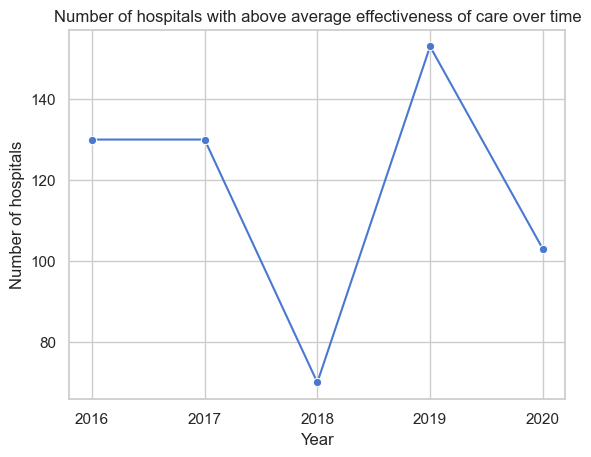

In [35]:
numbers = [len(best_effectiveness_of_care_2016_hospitals), len(best_effectiveness_of_care_2017_hospitals), len(best_effectiveness_of_care_2018_hospitals),
          len(best_effectiveness_of_care_2019_hospitals), len(best_effectiveness_of_care_2020_hospitals)]
years = [2016, 2017, 2018, 2019, 2020]
# Set the dark background style
sns.set_theme(style="whitegrid")
sns.set_palette("muted")
# Create a line plot
sns.lineplot(x=years, y=numbers, marker='o')
# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of hospitals')
plt.title('Number of hospitals with above average effectiveness of care over time')
# Display the plot
plt.xticks(years)  # Show only full years on the x-axis
plt.show()

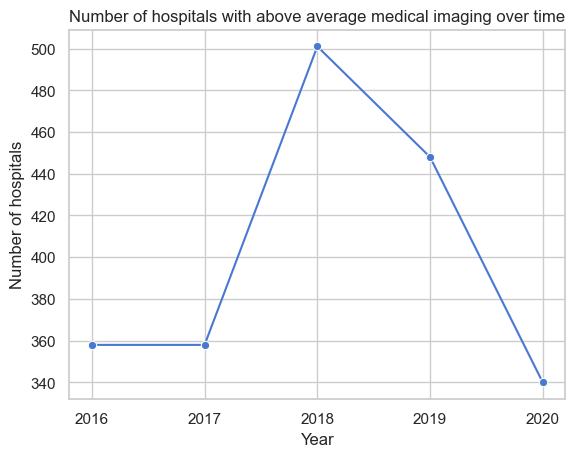

In [36]:
numbers = [len(best_medical_imaging_2016_hospitals), len(best_medical_imaging_2017_hospitals), len(best_medical_imaging_2018_hospitals),
          len(best_medical_imaging_2019_hospitals), len(best_medical_imaging_2020_hospitals)]
years = [2016, 2017, 2018, 2019, 2020]
# Set the dark background style
sns.set_theme(style="whitegrid")
sns.set_palette("muted")
# Create a line plot
sns.lineplot(x=years, y=numbers, marker='o')
# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of hospitals')
plt.title('Number of hospitals with above average medical imaging over time')
# Display the plot
plt.xticks(years)  # Show only full years on the x-axis
plt.show()

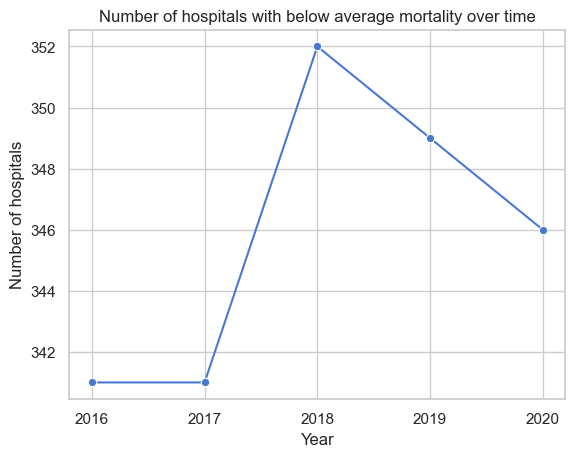

In [37]:
numbers = [len(best_mortality_2016_hospitals), len(best_mortality_2017_hospitals), len(best_mortality_2018_hospitals),
          len(best_mortality_2019_hospitals), len(best_mortality_2020_hospitals)]
years = [2016, 2017, 2018, 2019, 2020]
# Set the dark background style
sns.set_theme(style="whitegrid")
sns.set_palette("muted")
# Create a line plot
sns.lineplot(x=years, y=numbers, marker='o')
# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of hospitals')
plt.title('Number of hospitals with below average mortality over time')
# Display the plot
plt.xticks(years)  # Show only full years on the x-axis
plt.show()

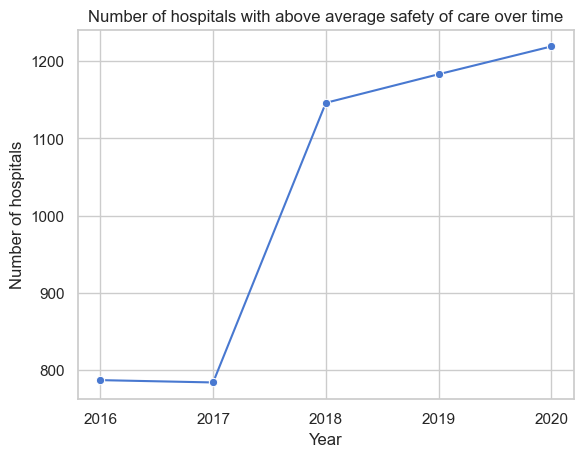

In [38]:
numbers = [len(best_safety_of_care_2016_hospitals), len(best_safety_of_care_2017_hospitals), len(best_safety_of_care_2018_hospitals),
          len(best_safety_of_care_2019_hospitals), len(best_safety_of_care_2020_hospitals)]
years = [2016, 2017, 2018, 2019, 2020]
# Set the dark background style
sns.set_theme(style="whitegrid")
sns.set_palette("muted")
# Create a line plot
sns.lineplot(x=years, y=numbers, marker='o')
# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of hospitals')
plt.title('Number of hospitals with above average safety of care over time')
# Display the plot
plt.xticks(years)  # Show only full years on the x-axis
plt.show()

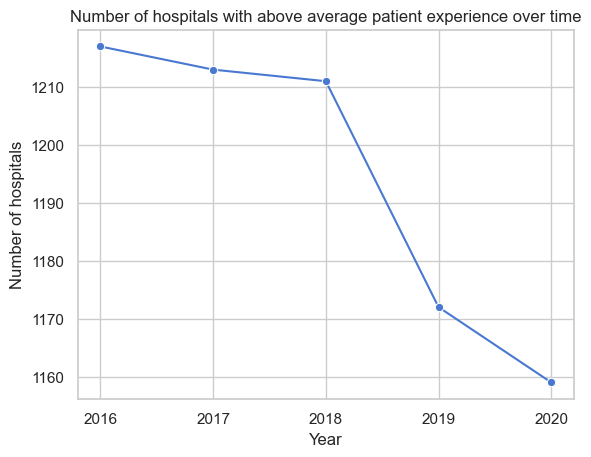

In [39]:
numbers = [len(best_patient_experience_2016_hospitals), len(best_patient_experience_2017_hospitals), len(best_patient_experience_2018_hospitals),
          len(best_patient_experience_2019_hospitals), len(best_patient_experience_2020_hospitals)]
years = [2016, 2017, 2018, 2019, 2020]
# Set the dark background style
sns.set_theme(style="whitegrid")
sns.set_palette("muted")
# Create a line plot
sns.lineplot(x=years, y=numbers, marker='o')
# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of hospitals')
plt.title('Number of hospitals with above average patient experience over time')
# Display the plot
plt.xticks(years)  # Show only full years on the x-axis
plt.show()

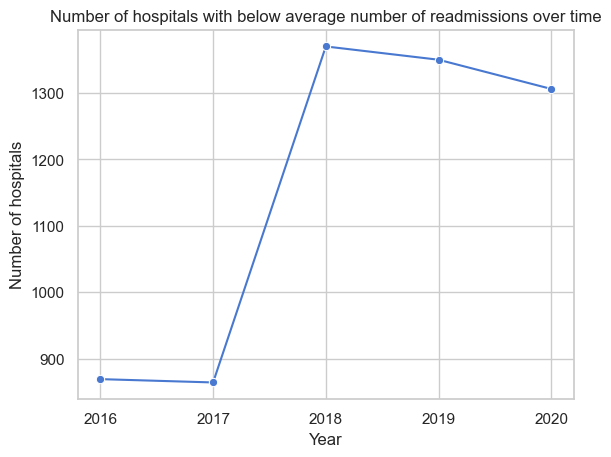

In [40]:
numbers = [len(best_readmission_2016_hospitals), len(best_readmission_2017_hospitals), len(best_readmission_2018_hospitals),
          len(best_readmission_2019_hospitals), len(best_readmission_2020_hospitals)]
years = [2016, 2017, 2018, 2019, 2020]
# Set the dark background style
sns.set_theme(style="whitegrid")
sns.set_palette("muted")
# Create a line plot
sns.lineplot(x=years, y=numbers, marker='o')
# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of hospitals')
plt.title('Number of hospitals with below average number of readmissions over time')
# Display the plot
plt.xticks(years)  # Show only full years on the x-axis
plt.show()

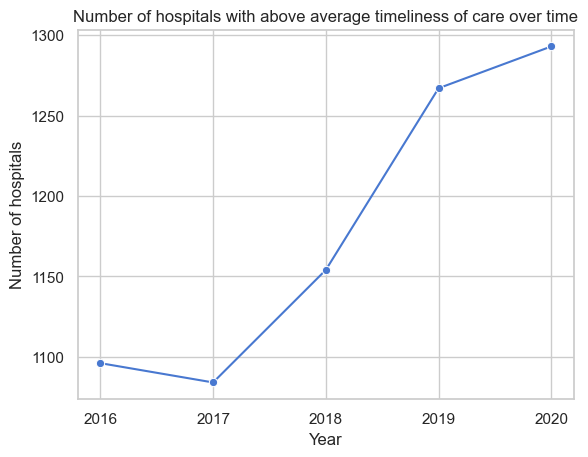

In [41]:
numbers = [len(best_timeliness_of_care_2016_hospitals), len(best_timeliness_of_care_2017_hospitals), len(best_timeliness_of_care_2018_hospitals),
          len(best_timeliness_of_care_2019_hospitals), len(best_timeliness_of_care_2020_hospitals)]
years = [2016, 2017, 2018, 2019, 2020]
# Set the dark background style
sns.set_theme(style="whitegrid")
sns.set_palette("muted")
# Create a line plot
sns.lineplot(x=years, y=numbers, marker='o')
# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of hospitals')
plt.title('Number of hospitals with above average timeliness of care over time')
# Display the plot
plt.xticks(years)  # Show only full years on the x-axis
plt.show()

In [42]:
#federal states that had the largest number of hospitals according to national comparison criteria and the best scores on them in 2016
print(best_effectiveness_of_care_2016[['State', 'Facility Name']].groupby('State').nunique().sort_values(by=['Facility Name'], ascending=False).head(1))
print(best_medical_imaging_2016[['State', 'Facility Name']].groupby('State').nunique().sort_values(by=['Facility Name'], ascending=False).head(1))
print(best_mortality_2016[['State', 'Facility Name']].groupby('State').nunique().sort_values(by=['Facility Name'], ascending=False).head(1))
print(best_patient_experience_2016[['State', 'Facility Name']].groupby('State').nunique().sort_values(by=['Facility Name'], ascending=False).head(1))
print(best_readmission_2016[['State', 'Facility Name']].groupby('State').nunique().sort_values(by=['Facility Name'], ascending=False).head(1))
print(best_safety_of_care_2016[['State', 'Facility Name']].groupby('State').nunique().sort_values(by=['Facility Name'], ascending=False).head(1))
print(best_timeliness_of_care_2016[['State', 'Facility Name']].groupby('State').nunique().sort_values(by=['Facility Name'], ascending=False).head(1))

       Facility Name
State               
PA                16
       Facility Name
State               
NC                29
       Facility Name
State               
CA                25
       Facility Name
State               
TX               103
       Facility Name
State               
FL                92
       Facility Name
State               
CA                77
       Facility Name
State               
TX                87


In [43]:
#federal states that had the largest number of hospitals according to national comparison criteria and the best scores on them in 2017
print(best_effectiveness_of_care_2017[['State', 'Facility Name']].groupby('State').nunique().sort_values(by=['Facility Name'], ascending=False).head(1))
print(best_medical_imaging_2017[['State', 'Facility Name']].groupby('State').nunique().sort_values(by=['Facility Name'], ascending=False).head(1))
print(best_mortality_2017[['State', 'Facility Name']].groupby('State').nunique().sort_values(by=['Facility Name'], ascending=False).head(1))
print(best_patient_experience_2017[['State', 'Facility Name']].groupby('State').nunique().sort_values(by=['Facility Name'], ascending=False).head(1))
print(best_readmission_2017[['State', 'Facility Name']].groupby('State').nunique().sort_values(by=['Facility Name'], ascending=False).head(1))
print(best_safety_of_care_2017[['State', 'Facility Name']].groupby('State').nunique().sort_values(by=['Facility Name'], ascending=False).head(1))
print(best_timeliness_of_care_2017[['State', 'Facility Name']].groupby('State').nunique().sort_values(by=['Facility Name'], ascending=False).head(1))

       Facility Name
State               
PA                16
       Facility Name
State               
NC                29
       Facility Name
State               
CA                25
       Facility Name
State               
TX               102
       Facility Name
State               
FL                91
       Facility Name
State               
CA                77
       Facility Name
State               
TX                84


In [44]:
#federal states that had the largest number of hospitals according to national comparison criteria and the best scores on them in 2018
print(best_effectiveness_of_care_2018[['State', 'Facility Name']].groupby('State').nunique().sort_values(by=['Facility Name'], ascending=False).head(1))
print(best_medical_imaging_2018[['State', 'Facility Name']].groupby('State').nunique().sort_values(by=['Facility Name'], ascending=False).head(1))
print(best_mortality_2018[['State', 'Facility Name']].groupby('State').nunique().sort_values(by=['Facility Name'], ascending=False).head(1))
print(best_patient_experience_2018[['State', 'Facility Name']].groupby('State').nunique().sort_values(by=['Facility Name'], ascending=False).head(1))
print(best_readmission_2018[['State', 'Facility Name']].groupby('State').nunique().sort_values(by=['Facility Name'], ascending=False).head(1))
print(best_safety_of_care_2018[['State', 'Facility Name']].groupby('State').nunique().sort_values(by=['Facility Name'], ascending=False).head(1))
print(best_timeliness_of_care_2018[['State', 'Facility Name']].groupby('State').nunique().sort_values(by=['Facility Name'], ascending=False).head(1))

       Facility Name
State               
PA                 9
       Facility Name
State               
NC                36
       Facility Name
State               
FL                28
       Facility Name
State               
TX                99
       Facility Name
State               
FL               111
       Facility Name
State               
CA               124
       Facility Name
State               
TX                85


In [45]:
#federal states that had the largest number of hospitals according to national comparison criteria and the best scores on them in 2019
print(best_effectiveness_of_care_2019[['State', 'Facility Name']].groupby('State').nunique().sort_values(by=['Facility Name'], ascending=False).head(1))
print(best_medical_imaging_2019[['State', 'Facility Name']].groupby('State').nunique().sort_values(by=['Facility Name'], ascending=False).head(1))
print(best_mortality_2019[['State', 'Facility Name']].groupby('State').nunique().sort_values(by=['Facility Name'], ascending=False).head(1))
print(best_patient_experience_2019[['State', 'Facility Name']].groupby('State').nunique().sort_values(by=['Facility Name'], ascending=False).head(1))
print(best_readmission_2019[['State', 'Facility Name']].groupby('State').nunique().sort_values(by=['Facility Name'], ascending=False).head(1))
print(best_safety_of_care_2019[['State', 'Facility Name']].groupby('State').nunique().sort_values(by=['Facility Name'], ascending=False).head(1))
print(best_timeliness_of_care_2019[['State', 'Facility Name']].groupby('State').nunique().sort_values(by=['Facility Name'], ascending=False).head(1))

       Facility Name
State               
FL                18
       Facility Name
State               
FL                43
       Facility Name
State               
FL                28
       Facility Name
State               
TX                96
       Facility Name
State               
CA               113
       Facility Name
State               
CA               107
       Facility Name
State               
TX                96


In [46]:
#federal states that had the largest number of hospitals according to national comparison criteria and the best scores on them in 2020
print(best_effectiveness_of_care_2020[['State', 'Facility Name']].groupby('State').nunique().sort_values(by=['Facility Name'], ascending=False).head(1))
print(best_medical_imaging_2020[['State', 'Facility Name']].groupby('State').nunique().sort_values(by=['Facility Name'], ascending=False).head(1))
print(best_mortality_2020[['State', 'Facility Name']].groupby('State').nunique().sort_values(by=['Facility Name'], ascending=False).head(1))
print(best_patient_experience_2020[['State', 'Facility Name']].groupby('State').nunique().sort_values(by=['Facility Name'], ascending=False).head(1))
print(best_readmission_2020[['State', 'Facility Name']].groupby('State').nunique().sort_values(by=['Facility Name'], ascending=False).head(1))
print(best_safety_of_care_2020[['State', 'Facility Name']].groupby('State').nunique().sort_values(by=['Facility Name'], ascending=False).head(1))
print(best_timeliness_of_care_2020[['State', 'Facility Name']].groupby('State').nunique().sort_values(by=['Facility Name'], ascending=False).head(1))

       Facility Name
State               
FL                21
       Facility Name
State               
FL                35
       Facility Name
State               
FL                26
       Facility Name
State               
TX                87
       Facility Name
State               
FL               108
       Facility Name
State               
CA               118
       Facility Name
State               
TX               105


In [47]:
#hospitals that had an overall rating of 1 in 2016, 2 in 2017 and so on
#later we will look for a cross-section, that is, we are looking for those hospitals where there is a visible shift for the better over time
overall_rating_1_2016 = dataset_cms_2[(dataset_cms_2['Year'] == 2016) & (dataset_cms_2['Hospital overall rating'] == '1') & (dataset_cms_2['HCAHPS Question'] == 'Summary star rating')][['Facility Name', 'State', 'City', 'HCAHPS Question','Patient Survey Star Rating', 'HCAHPS Linear Mean Value', 'Number of Completed Surveys', 'Hospital overall rating']]
overall_rating_2_2017 = dataset_cms_2[(dataset_cms_2['Year'] == 2017) & (dataset_cms_2['Hospital overall rating'] == '2') & (dataset_cms_2['HCAHPS Question'] == 'Summary star rating')][['Facility Name', 'State', 'City', 'HCAHPS Question','Patient Survey Star Rating', 'HCAHPS Linear Mean Value', 'Number of Completed Surveys', 'Hospital overall rating']]
overall_rating_3_2018 = dataset_cms_2[(dataset_cms_2['Year'] == 2018) & (dataset_cms_2['Hospital overall rating'] == '3') & (dataset_cms_2['HCAHPS Question'] == 'Summary star rating')][['Facility Name', 'State', 'City', 'HCAHPS Question','Patient Survey Star Rating', 'HCAHPS Linear Mean Value', 'Number of Completed Surveys', 'Hospital overall rating']]
overall_rating_4_2019 = dataset_cms_2[(dataset_cms_2['Year'] == 2019) & (dataset_cms_2['Hospital overall rating'] == '4') & (dataset_cms_2['HCAHPS Question'] == 'Summary star rating')][['Facility Name', 'State', 'City', 'HCAHPS Question','Patient Survey Star Rating', 'HCAHPS Linear Mean Value', 'Number of Completed Surveys', 'Hospital overall rating']]
overall_rating_5_2020 = dataset_cms_2[(dataset_cms_2['Year'] == 2020) & (dataset_cms_2['Hospital overall rating'] == '5') & (dataset_cms_2['HCAHPS Question'] == 'Summary star rating')][['Facility Name', 'State', 'City', 'HCAHPS Question','Patient Survey Star Rating', 'HCAHPS Linear Mean Value', 'Number of Completed Surveys', 'Hospital overall rating']]

In [48]:
#conversion of the obtained data into dictionaries and then into lists
hospitals_overall_rating_1_2016 = list(overall_rating_1_2016.to_dict()['Facility Name'].values())
hospitals_overall_rating_2_2017 = list(overall_rating_2_2017.to_dict()['Facility Name'].values())
hospitals_overall_rating_3_2018 = list(overall_rating_3_2018.to_dict()['Facility Name'].values())
hospitals_overall_rating_4_2019 = list(overall_rating_4_2019.to_dict()['Facility Name'].values())
hospitals_overall_rating_5_2020 = list(overall_rating_5_2020.to_dict()['Facility Name'].values())

In [49]:
#there is no hospital that made a jump in rating from 1 to 5 in the observed period
[x for x in hospitals_overall_rating_1_2016 if x in hospitals_overall_rating_2_2017 and x in hospitals_overall_rating_3_2018 and x in hospitals_overall_rating_4_2019 and x in hospitals_overall_rating_5_2020]
#there are two hospitals that made a jump from overall rating 1 to 4 in the observed period: ['HOLY CROSS HOSPITAL', 'MERCY MEDICAL CENTER']
[x for x in hospitals_overall_rating_1_2016 if x in hospitals_overall_rating_2_2017 and x in hospitals_overall_rating_3_2018 and x in hospitals_overall_rating_4_2019]
#there are two hospitals that made a jump from overall rating 1 to 3 in the observed period: ['HOLY CROSS HOSPITAL', 'MERCY MEDICAL CENTER']
[x for x in hospitals_overall_rating_1_2016 if x in hospitals_overall_rating_2_2017 and x in hospitals_overall_rating_3_2018]
#there are three hospitals that made a jump from overall rating 1 to 2 in the observed period: ['PROVIDENCE HOSPITAL', 'HOLY CROSS HOSPITAL', 'MERCY MEDICAL CENTER']
[x for x in hospitals_overall_rating_1_2016 if x in hospitals_overall_rating_2_2017]

['PROVIDENCE HOSPITAL', 'HOLY CROSS HOSPITAL', 'MERCY MEDICAL CENTER']

In [50]:
#hospitals that had an overall rating of 5 in 2016, 4 in 2017 and so on
#later we will look for a cross-section, that is, those that gradually worsened according to the overall rating
overall_rating_5_2016 = dataset_cms_2[(dataset_cms_2['Year'] == 2016) & (dataset_cms_2['Hospital overall rating'] == '5') & (dataset_cms_2['HCAHPS Question'] == 'Summary star rating')][['Facility Name', 'State', 'City', 'HCAHPS Question','Patient Survey Star Rating', 'HCAHPS Linear Mean Value', 'Number of Completed Surveys', 'Hospital overall rating']]
overall_rating_4_2017 = dataset_cms_2[(dataset_cms_2['Year'] == 2017) & (dataset_cms_2['Hospital overall rating'] == '4') & (dataset_cms_2['HCAHPS Question'] == 'Summary star rating')][['Facility Name', 'State', 'City', 'HCAHPS Question','Patient Survey Star Rating', 'HCAHPS Linear Mean Value', 'Number of Completed Surveys', 'Hospital overall rating']]
overall_rating_3_2018 = dataset_cms_2[(dataset_cms_2['Year'] == 2018) & (dataset_cms_2['Hospital overall rating'] == '3') & (dataset_cms_2['HCAHPS Question'] == 'Summary star rating')][['Facility Name', 'State', 'City', 'HCAHPS Question','Patient Survey Star Rating', 'HCAHPS Linear Mean Value', 'Number of Completed Surveys', 'Hospital overall rating']]
overall_rating_2_2019 = dataset_cms_2[(dataset_cms_2['Year'] == 2019) & (dataset_cms_2['Hospital overall rating'] == '2') & (dataset_cms_2['HCAHPS Question'] == 'Summary star rating')][['Facility Name', 'State', 'City', 'HCAHPS Question','Patient Survey Star Rating', 'HCAHPS Linear Mean Value', 'Number of Completed Surveys', 'Hospital overall rating']]
overall_rating_1_2020 = dataset_cms_2[(dataset_cms_2['Year'] == 2020) & (dataset_cms_2['Hospital overall rating'] == '1') & (dataset_cms_2['HCAHPS Question'] == 'Summary star rating')][['Facility Name', 'State', 'City', 'HCAHPS Question','Patient Survey Star Rating', 'HCAHPS Linear Mean Value', 'Number of Completed Surveys', 'Hospital overall rating']]

In [51]:
#conversion of the obtained data into dictionaries and then into lists
hospitals_overall_rating_5_2016 = list(overall_rating_5_2016.to_dict()['Facility Name'].values())
hospitals_overall_rating_4_2017 = list(overall_rating_4_2017.to_dict()['Facility Name'].values())
hospitals_overall_rating_3_2018 = list(overall_rating_3_2018.to_dict()['Facility Name'].values())
hospitals_overall_rating_2_2019 = list(overall_rating_2_2019.to_dict()['Facility Name'].values())
hospitals_overall_rating_1_2020 = list(overall_rating_1_2020.to_dict()['Facility Name'].values())

In [52]:
#there are no hospitals that successively worsened according to the overall rating from 5 to 1 in the observed period
[x for x in hospitals_overall_rating_5_2016 if x in hospitals_overall_rating_4_2017 and x in hospitals_overall_rating_3_2018 and x in hospitals_overall_rating_2_2019 and x in hospitals_overall_rating_1_2020]
#there are no hospitals that have deteriorated consecutively according to the overall rating from 5 to 2
[x for x in hospitals_overall_rating_5_2016 if x in hospitals_overall_rating_4_2017 and x in hospitals_overall_rating_3_2018 and x in hospitals_overall_rating_2_2019]
#there are no hospitals that have deteriorated consecutively according to the overall rating from 5 to 3 
[x for x in hospitals_overall_rating_5_2016 if x in hospitals_overall_rating_4_2017 and x in hospitals_overall_rating_3_2018]
#hospitals that dropped from an overall rating of 5 to 4 from 2016 to 2017 : ['MERCY REGIONAL MEDICAL CENTER', 'MERCY HOSPITAL', 'FAIRVIEW HOSPITAL']
[x for x in hospitals_overall_rating_5_2016 if x in hospitals_overall_rating_4_2017]

['MERCY REGIONAL MEDICAL CENTER', 'MERCY HOSPITAL', 'FAIRVIEW HOSPITAL']

In [53]:
#conversion of the variable HCAHPS Linear Mean Value into a numerical one
dataset_cms_2['HCAHPS Linear Mean Value'] = dataset_cms_2['HCAHPS Linear Mean Value'].apply(pd.to_numeric, errors = 'ignore')

C:\Users\dinod\AppData\Local\Temp\ipykernel_24380\2921333523.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_cms_2['HCAHPS Linear Mean Value'] = dataset_cms_2['HCAHPS Linear Mean Value'].apply(pd.to_numeric, errors = 'ignore')


In [54]:
#conversion of the Hospital overall rating variable into a numerical one
dataset_cms_2['Hospital overall rating'] = dataset_cms_2['Hospital overall rating'].apply(pd.to_numeric, errors = 'ignore')

C:\Users\dinod\AppData\Local\Temp\ipykernel_24380\2606907325.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_cms_2['Hospital overall rating'] = dataset_cms_2['Hospital overall rating'].apply(pd.to_numeric, errors = 'ignore')


In [55]:
#data about hospitals and other healthcare institutions that had the highest LMV total in 2016
#data is sorted in descending order by HCAHPS Linear Mean Value sum
total_lmv_2016 = dataset_cms_2[(dataset_cms_2['Year'] == 2016) & (dataset_cms_2['HCAHPS Question'].str.contains('linear')) & (dataset_cms_2['HCAHPS Linear Mean Value'] != 'Not Available')][['Facility Name', 'State', 'Year', 'City', 'HCAHPS Question', 'HCAHPS Linear Mean Value', 'Hospital overall rating']].groupby(['Facility Name', 'State', 'City', 'Year', 'Hospital overall rating']).sum().sort_values(by=['Year', 'HCAHPS Linear Mean Value'], ascending=[True, False])
dataset_cms_2[(dataset_cms_2['Year'] == 2016) & (dataset_cms_2['HCAHPS Question'].str.contains('linear')) & (dataset_cms_2['HCAHPS Linear Mean Value'] != 'Not Available')][['Facility Name', 'State', 'Year', 'City', 'HCAHPS Question', 'HCAHPS Linear Mean Value', 'Hospital overall rating']].groupby(['Facility Name', 'State', 'City', 'Year', 'Hospital overall rating']).sum().sort_values(by=['Year', 'HCAHPS Linear Mean Value'], ascending=[True, False]).head(10)

,,,,,HCAHPS Question,HCAHPS Linear Mean Value
Facility Name,State,City,Year,Hospital overall rating,,
T J HEALTH COLUMBIA,KY,COLUMBIA,2016,4,Cleanliness - linear mean scoreNurse communica...,1080
BIGFORK VALLEY HOSPITAL,MN,BIGFORK,2016,Not Available,Cleanliness - linear mean scoreNurse communica...,1063
PATIENTS' HOSPITAL OF REDDING,CA,REDDING,2016,Not Available,Cleanliness - linear mean scoreNurse communica...,1059
ADVANCED SURGICAL HOSPITAL,PA,WASHINGTON,2016,Not Available,Cleanliness - linear mean scoreNurse communica...,1053
IOWA SPECIALTY HOSPITAL - BELMOND,IA,BELMOND,2016,5,Cleanliness - linear mean scoreNurse communica...,1045
MONROE SURGICAL HOSPITAL,LA,MONROE,2016,Not Available,Cleanliness - linear mean scoreNurse communica...,1039
SUGAR LAND SURGICAL HOSPITAL LLP,TX,SUGAR LAND,2016,Not Available,Cleanliness - linear mean scoreNurse communica...,1039
SURGICAL HOSPITAL AT SOUTHWOODS,OH,YOUNGSTOWN,2016,5,Cleanliness - linear mean scoreNurse communica...,1039
HOPEDALE MEDICAL COMPLEX,IL,HOPEDALE,2016,Not Available,Cleanliness - linear mean scoreNurse communica...,1038


In [56]:
#data about hospitals and other healthcare institutions that had the highest LMV total in 2017
#data is sorted in descending order by HCAHPS Linear Mean Value sum
total_lmv_2017 = dataset_cms_2[(dataset_cms_2['Year'] == 2017) & (dataset_cms_2['HCAHPS Question'].str.contains('linear')) & (dataset_cms_2['HCAHPS Linear Mean Value'] != 'Not Available')][['Facility Name', 'State', 'Year', 'City', 'HCAHPS Question', 'HCAHPS Linear Mean Value', 'Hospital overall rating']].groupby(['Facility Name', 'State', 'City', 'Year', 'Hospital overall rating']).sum().sort_values(by=['Year', 'HCAHPS Linear Mean Value'], ascending=[True, False])
dataset_cms_2[(dataset_cms_2['Year'] == 2017) & (dataset_cms_2['HCAHPS Question'].str.contains('linear')) & (dataset_cms_2['HCAHPS Linear Mean Value'] != 'Not Available')][['Facility Name', 'State', 'Year', 'City', 'HCAHPS Question', 'HCAHPS Linear Mean Value', 'Hospital overall rating']].groupby(['Facility Name', 'State', 'City', 'Year', 'Hospital overall rating']).sum().sort_values(by=['Year', 'HCAHPS Linear Mean Value'], ascending=[True, False]).head(10)

,,,,,HCAHPS Question,HCAHPS Linear Mean Value
Facility Name,State,City,Year,Hospital overall rating,,
CITIZENS MEDICAL CENTER,LA,COLUMBIA,2017,3,Cleanliness - linear mean scoreNurse communica...,1068
BIGFORK VALLEY HOSPITAL,MN,BIGFORK,2017,Not Available,Cleanliness - linear mean scoreNurse communica...,1065
HOPEDALE HOSPITAL,IL,HOPEDALE,2017,Not Available,Cleanliness - linear mean scoreNurse communica...,1050
IOWA SPECIALTY HOSPITAL - BELMOND,IA,BELMOND,2017,5,Cleanliness - linear mean scoreNurse communica...,1048
ADVANCED SURGICAL HOSPITAL,PA,WASHINGTON,2017,Not Available,Cleanliness - linear mean scoreNurse communica...,1044
PATIENTS' HOSPITAL OF REDDING,CA,REDDING,2017,Not Available,Cleanliness - linear mean scoreNurse communica...,1043
SUGAR LAND SURGICAL HOSPITAL LLP,TX,SUGAR LAND,2017,Not Available,Cleanliness - linear mean scoreNurse communica...,1038
ORTHOPAEDIC HOSPITAL OF WISCONSIN,WI,GLENDALE,2017,Not Available,Cleanliness - linear mean scoreNurse communica...,1036
SAME DAY SURGERY CENTER LLC,SD,RAPID CITY,2017,Not Available,Cleanliness - linear mean scoreNurse communica...,1036


In [57]:
#data about hospitals and other healthcare institutions that had the highest LMV total in 2018
#data is sorted in descending order by HCAHPS Linear Mean Value sum
total_lmv_2018 = dataset_cms_2[(dataset_cms_2['Year'] == 2018) & (dataset_cms_2['HCAHPS Question'].str.contains('linear')) & (dataset_cms_2['HCAHPS Linear Mean Value'] != 'Not Available')][['Facility Name', 'State', 'Year', 'City', 'HCAHPS Question', 'HCAHPS Linear Mean Value', 'Hospital overall rating']].groupby(['Facility Name', 'State', 'City', 'Year', 'Hospital overall rating']).sum().sort_values(by=['Year', 'HCAHPS Linear Mean Value'], ascending=[True, False])
dataset_cms_2[(dataset_cms_2['Year'] == 2018) & (dataset_cms_2['HCAHPS Question'].str.contains('linear')) & (dataset_cms_2['HCAHPS Linear Mean Value'] != 'Not Available')][['Facility Name', 'State', 'Year', 'City', 'HCAHPS Question', 'HCAHPS Linear Mean Value', 'Hospital overall rating']].groupby(['Facility Name', 'State', 'City', 'Year', 'Hospital overall rating']).sum().sort_values(by=['Year', 'HCAHPS Linear Mean Value'], ascending=[True, False]).head(10)

,,,,,HCAHPS Question,HCAHPS Linear Mean Value
Facility Name,State,City,Year,Hospital overall rating,,
CITIZENS MEDICAL CENTER,LA,COLUMBIA,2018,4,Cleanliness - linear mean scoreNurse communica...,971
IOWA SPECIALTY HOSPITAL - BELMOND,IA,BELMOND,2018,5,Cleanliness - linear mean scoreNurse communica...,948
SAME DAY SURGERY CENTER LLC,SD,RAPID CITY,2018,Not Available,Cleanliness - linear mean scoreNurse communica...,947
CASEY COUNTY HOSPITAL,KY,LIBERTY,2018,2,Cleanliness - linear mean scoreNurse communica...,945
HOPEDALE HOSPITAL,IL,HOPEDALE,2018,5,Cleanliness - linear mean scoreNurse communica...,945
SUGAR LAND SURGICAL HOSPITAL LLP,TX,SUGAR LAND,2018,5,Cleanliness - linear mean scoreNurse communica...,944
BIGFORK VALLEY HOSPITAL,MN,BIGFORK,2018,Not Available,Cleanliness - linear mean scoreNurse communica...,943
BLACK HILLS SURGICAL HOSPITAL LLP,SD,RAPID CITY,2018,Not Available,Cleanliness - linear mean scoreNurse communica...,942
PHYSICIAN'S CARE SURGICAL HOSPITAL,PA,ROYERSFORD,2018,Not Available,Cleanliness - linear mean scoreNurse communica...,942


In [58]:
#data about hospitals and other healthcare institutions that had the highest LMV total in 2019
#data is sorted in descending order by HCAHPS Linear Mean Value sum
total_lmv_2019 = dataset_cms_2[(dataset_cms_2['Year'] == 2019) & (dataset_cms_2['HCAHPS Question'].str.contains('linear')) & (dataset_cms_2['HCAHPS Linear Mean Value'] != 'Not Available')][['Facility Name', 'State', 'Year', 'City', 'HCAHPS Question', 'HCAHPS Linear Mean Value', 'Hospital overall rating']].groupby(['Facility Name', 'State', 'City', 'Year', 'Hospital overall rating']).sum().sort_values(by=['Year', 'HCAHPS Linear Mean Value'], ascending=[True, False])
dataset_cms_2[(dataset_cms_2['Year'] == 2019) & (dataset_cms_2['HCAHPS Question'].str.contains('linear')) & (dataset_cms_2['HCAHPS Linear Mean Value'] != 'Not Available')][['Facility Name', 'State', 'Year', 'City', 'HCAHPS Question', 'HCAHPS Linear Mean Value', 'Hospital overall rating']].groupby(['Facility Name', 'State', 'City', 'Year', 'Hospital overall rating']).sum().sort_values(by=['Year', 'HCAHPS Linear Mean Value'], ascending=[True, False]).head(10)

,,,,,HCAHPS Question,HCAHPS Linear Mean Value
Facility Name,State,City,Year,Hospital overall rating,,
BIGFORK VALLEY HOSPITAL,MN,BIGFORK,2019,Not Available,Nurse communication - linear mean scoreDoctor ...,954
OAKLEAF SURGICAL HOSPITAL,WI,ALTOONA,2019,5,Nurse communication - linear mean scoreDoctor ...,950
SACRED HEART HOSPITAL ON THE GULF,FL,PORT SAINT JOE,2019,5,Nurse communication - linear mean scoreDoctor ...,947
FRANCISCAN HEALTH CARMEL,IN,CARMEL,2019,5,Nurse communication - linear mean scoreDoctor ...,946
MARINERS HOSPITAL,FL,TAVERNIER,2019,5,Nurse communication - linear mean scoreDoctor ...,946
CASEY COUNTY HOSPITAL,KY,LIBERTY,2019,4,Nurse communication - linear mean scoreDoctor ...,945
MIDWESTERN REGION MED CENTER,IL,ZION,2019,5,Nurse communication - linear mean scoreDoctor ...,945
IOWA SPECIALTY HOSPITAL - BELMOND,IA,BELMOND,2019,5,Nurse communication - linear mean scoreDoctor ...,944
PHYSICIAN'S CARE SURGICAL HOSPITAL,PA,ROYERSFORD,2019,Not Available,Nurse communication - linear mean scoreDoctor ...,943


In [59]:
#data about hospitals and other healthcare institutions that had the highest LMV total in 2020
#data is sorted in descending order by HCAHPS Linear Mean Value sum
total_lmv_2020 = dataset_cms_2[(dataset_cms_2['Year'] == 2020) & (dataset_cms_2['HCAHPS Question'].str.contains('linear')) & (dataset_cms_2['HCAHPS Linear Mean Value'] != 'Not Available')][['Facility Name', 'State', 'Year', 'City', 'HCAHPS Question', 'HCAHPS Linear Mean Value', 'Hospital overall rating']].groupby(['Facility Name', 'State', 'City', 'Year', 'Hospital overall rating']).sum().sort_values(by=['Year', 'HCAHPS Linear Mean Value'], ascending=[True, False])
dataset_cms_2[(dataset_cms_2['Year'] == 2020) & (dataset_cms_2['HCAHPS Question'].str.contains('linear')) & (dataset_cms_2['HCAHPS Linear Mean Value'] != 'Not Available')][['Facility Name', 'State', 'Year', 'City', 'HCAHPS Question', 'HCAHPS Linear Mean Value', 'Hospital overall rating']].groupby(['Facility Name', 'State', 'City', 'Year', 'Hospital overall rating']).sum().sort_values(by=['Year', 'HCAHPS Linear Mean Value'], ascending=[True, False]).head(10)

,,,,,HCAHPS Question,HCAHPS Linear Mean Value
Facility Name,State,City,Year,Hospital overall rating,,
HEALTHMARK REGIONAL MEDICAL CENTER,FL,DEFUNIAK SPRINGS,2020,4,Nurse communication - linear mean scoreDoctor ...,952
HOPEDALE HOSPITAL,IL,HOPEDALE,2020,Not Available,Nurse communication - linear mean scoreDoctor ...,951
OAKLEAF SURGICAL HOSPITAL,WI,ALTOONA,2020,Not Available,Nurse communication - linear mean scoreDoctor ...,950
CASEY COUNTY HOSPITAL,KY,LIBERTY,2020,4,Nurse communication - linear mean scoreDoctor ...,949
IOWA SPECIALTY HOSPITAL - BELMOND,IA,BELMOND,2020,5,Nurse communication - linear mean scoreDoctor ...,949
PATIENTS' HOSPITAL OF REDDING,CA,REDDING,2020,Not Available,Nurse communication - linear mean scoreDoctor ...,949
SWIFT COUNTY BENSON HOSPITAL,MN,BENSON,2020,Not Available,Nurse communication - linear mean scoreDoctor ...,948
CENTRAL LOUISIANA SURGICAL HOSPITAL,LA,ALEXANDRIA,2020,Not Available,Nurse communication - linear mean scoreDoctor ...,945
MARINERS HOSPITAL,FL,TAVERNIER,2020,5,Nurse communication - linear mean scoreDoctor ...,944


In [60]:
#lists of the best hospitals by total LMV value by year
best_hospitals_LMV_2016 = list(total_lmv_2016.to_dict()['HCAHPS Linear Mean Value'].items())[:10]
best_hospitals_LMV_2017 = list(total_lmv_2017.to_dict()['HCAHPS Linear Mean Value'].items())[:10]
best_hospitals_LMV_2018 = list(total_lmv_2018.to_dict()['HCAHPS Linear Mean Value'].items())[:10]
best_hospitals_LMV_2019 = list(total_lmv_2019.to_dict()['HCAHPS Linear Mean Value'].items())[:10]
best_hospitals_LMV_2020 = list(total_lmv_2020.to_dict()['HCAHPS Linear Mean Value'].items())[:10]
list_of_best_hospitals_LMV_2016 = [(x[0][0], x[1]) for x in best_hospitals_LMV_2016]
list_of_best_hospitals_LMV_2017 = [(x[0][0], x[1]) for x in best_hospitals_LMV_2017]
list_of_best_hospitals_LMV_2018 = [(x[0][0], x[1]) for x in best_hospitals_LMV_2018]
list_of_best_hospitals_LMV_2019 = [(x[0][0], x[1]) for x in best_hospitals_LMV_2019]
list_of_best_hospitals_LMV_2020 = [(x[0][0], x[1]) for x in best_hospitals_LMV_2020]

In [61]:
print(list_of_best_hospitals_LMV_2016)
print('\n')
print(list_of_best_hospitals_LMV_2017)
print('\n')
print(list_of_best_hospitals_LMV_2018)
print('\n')
print(list_of_best_hospitals_LMV_2019)
print('\n')
print(list_of_best_hospitals_LMV_2020)

[('T J HEALTH COLUMBIA', 1080), ('BIGFORK VALLEY HOSPITAL', 1063), ("PATIENTS' HOSPITAL OF REDDING", 1059), ('ADVANCED SURGICAL HOSPITAL', 1053), ('IOWA SPECIALTY HOSPITAL - BELMOND', 1045), ('MONROE SURGICAL HOSPITAL', 1039), ('SUGAR LAND SURGICAL HOSPITAL LLP', 1039), ('SURGICAL HOSPITAL AT SOUTHWOODS', 1039), ('HOPEDALE MEDICAL COMPLEX', 1038), ('SURGICAL INSTITUTE OF READING', 1038)]


[('CITIZENS MEDICAL CENTER', 1068), ('BIGFORK VALLEY HOSPITAL', 1065), ('HOPEDALE HOSPITAL', 1050), ('IOWA SPECIALTY HOSPITAL - BELMOND', 1048), ('ADVANCED SURGICAL HOSPITAL', 1044), ("PATIENTS' HOSPITAL OF REDDING", 1043), ('SUGAR LAND SURGICAL HOSPITAL LLP', 1038), ('ORTHOPAEDIC HOSPITAL OF WISCONSIN', 1036), ('SAME DAY SURGERY CENTER LLC', 1036), ('SURGICAL HOSPITAL AT SOUTHWOODS', 1036)]


[('CITIZENS MEDICAL CENTER', 971), ('IOWA SPECIALTY HOSPITAL - BELMOND', 948), ('SAME DAY SURGERY CENTER LLC', 947), ('CASEY COUNTY HOSPITAL', 945), ('HOPEDALE HOSPITAL', 945), ('SUGAR LAND SURGICAL HOSPITAL LL

In [62]:
#hospitals that are in the top 10 by LMV value in 2016 and 2017, 6 hospitals
#['BIGFORK VALLEY HOSPITAL', "PATIENTS' HOSPITAL OF REDDING", 'ADVANCED SURGICAL HOSPITAL',
#'IOWA SPECIALTY HOSPITAL - BELMOND', 'SUGAR LAND SURGICAL HOSPITAL LLP','SURGICAL HOSPITAL AT SOUTHWOODS']
[x for x in list_of_best_hospitals_LMV_2016 if x in list_of_best_hospitals_LMV_2017]

#hospitals that are in the top 10 by LMV value in 2016, 2017 and 2018, 4 hospitals
#['BIGFORK VALLEY HOSPITAL','IOWA SPECIALTY HOSPITAL - BELMOND','SUGAR LAND SURGICAL HOSPITAL LLP','SURGICAL HOSPITAL AT SOUTHWOODS']
[x for x in list_of_best_hospitals_LMV_2016 if x in list_of_best_hospitals_LMV_2017 and x in list_of_best_hospitals_LMV_2018]

#hospitals that are in the top 10 by LMV value in 2016, 2017, 2018 and 2019, 2 hospitals
#['BIGFORK VALLEY HOSPITAL', 'IOWA SPECIALTY HOSPITAL - BELMOND']
[x for x in list_of_best_hospitals_LMV_2016 if x in list_of_best_hospitals_LMV_2017 and x in list_of_best_hospitals_LMV_2018 and x in list_of_best_hospitals_LMV_2019]

#hospitals that appear in the top 10 by LMV total in all 5 observed years
#it's just ['IOWA SPECIALTY HOSPITAL - BELMOND']
[x for x in list_of_best_hospitals_LMV_2016 if x in list_of_best_hospitals_LMV_2017 and x in list_of_best_hospitals_LMV_2018 and x in list_of_best_hospitals_LMV_2019 and x in list_of_best_hospitals_LMV_2020]

[]

In [63]:
#intersection of the list of the best hospitals rated according to the patient survey star rating and hospital overall rating and the top 10 list according to the total LMV sum for 2016
#it's about two hospitals: ['IOWA SPECIALTY HOSPITAL - BELMOND', 'SURGICAL HOSPITAL AT SOUTHWOODS']
[x for x in list_of_best_hospitals_2016 if x in list_of_best_hospitals_LMV_2016]

#intersection of the list of the best hospitals rated according to the patient survey star rating and hospital overall rating and the top 10 list according to the total LMV sum for 2017
#it's about two hospitals: ['IOWA SPECIALTY HOSPITAL - BELMOND', 'SURGICAL HOSPITAL AT SOUTHWOODS']
[x for x in list_of_best_hospitals_2017 if x in list_of_best_hospitals_LMV_2017]

#intersection of the list of the best hospitals rated according to the patient survey star rating and hospital overall rating and the top 10 list according to the total LMV sum for 2018
#it's about 4 hospitals: ['HOPEDALE HOSPITAL', 'IOWA SPECIALTY HOSPITAL - BELMOND', 'SUGAR LAND SURGICAL HOSPITAL LLP', 'SURGICAL HOSPITAL AT SOUTHWOODS']
[x for x in list_of_best_hospitals_2018 if x in list_of_best_hospitals_LMV_2018]

#intersection of the list of the best hospitals rated according to the patient survey star rating and hospital overall rating and the top 10 list according to the total LMV sum for 2019
#it's about 6 hospitals: ['FRANCISCAN HEALTH CARMEL', 'IOWA SPECIALTY HOSPITAL - BELMOND', 'MARINERS HOSPITAL', 'MIDWESTERN REGION MED CENTER', 'OAKLEAF SURGICAL HOSPITAL', 'SACRED HEART HOSPITAL ON THE GULF']
[x for x in list_of_best_hospitals_2019 if x in list_of_best_hospitals_LMV_2019]

#section of the list of the best hospitals rated according to the patient survey star rating and hospital overall rating and the top 10 list according to the total LMV sum for 2020
#it is about two hospitals: ['IOWA SPECIALTY HOSPITAL - BELMOND', 'MARINERS HOSPITAL']
[x for x in list_of_best_hospitals_2020 if x in list_of_best_hospitals_LMV_2020]

[]

In [64]:
dataset_for_kmeans = dataset_cms_2

In [65]:
dataset_for_kmeans = dataset_for_kmeans.drop(['Unnamed: 0', 'Address', 'City', 'State', 'ZIP Code', 'County Name', 'Phone Number', 'HCAHPS Measure ID', 'Start Date', 'End Date'], axis = 1)
dataset_for_kmeans = dataset_for_kmeans.drop(columns=['Efficient use of medical imaging national comparison footnote', 'Timeliness of care national comparison footnote', 'Effectiveness of care national comparison footnote', 'Patient experience national comparison footnote', 'Readmission national comparison footnote', 'Safety of care national comparison footnote', 'Mortality national comparison footnote', 'Survey Response Rate Percent Footnote', 'Number of Completed Surveys Footnote', 'HCAHPS Answer Percent Footnote', 'Patient Survey Star Rating Footnote', 'Hospital overall rating footnote'], axis = 1)
dataset_for_kmeans = dataset_for_kmeans.drop(['HCAHPS Answer Percent', 'Survey Response Rate Percent', 'Number of Completed Surveys', 'HCAHPS Linear Mean Value'], axis = 1)

In [66]:
dataset_for_kmeans_2016 = dataset_for_kmeans[(dataset_cms['Year'] == 2016) & (dataset_cms['HCAHPS Answer Description'].str.contains('star rating'))][['Facility ID', 'Facility Name', 'HCAHPS Question','Patient Survey Star Rating', 'Hospital overall rating', 'Mortality national comparison', 'Safety of care national comparison', 'Readmission national comparison', 'Patient experience national comparison', 'Effectiveness of care national comparison', 'Timeliness of care national comparison', 'Efficient use of medical imaging national comparison']]
dataset_for_kmeans_2017 = dataset_for_kmeans[(dataset_cms['Year'] == 2017) & (dataset_cms['HCAHPS Answer Description'].str.contains('star rating'))][['Facility ID', 'Facility Name', 'HCAHPS Question','Patient Survey Star Rating', 'Hospital overall rating', 'Mortality national comparison', 'Safety of care national comparison', 'Readmission national comparison', 'Patient experience national comparison', 'Effectiveness of care national comparison', 'Timeliness of care national comparison', 'Efficient use of medical imaging national comparison']]
dataset_for_kmeans_2018 = dataset_for_kmeans[(dataset_cms['Year'] == 2018) & (dataset_cms['HCAHPS Answer Description'].str.contains('star rating'))][['Facility ID', 'Facility Name', 'HCAHPS Question','Patient Survey Star Rating', 'Hospital overall rating', 'Mortality national comparison', 'Safety of care national comparison', 'Readmission national comparison', 'Patient experience national comparison', 'Effectiveness of care national comparison', 'Timeliness of care national comparison', 'Efficient use of medical imaging national comparison']]
dataset_for_kmeans_2019 = dataset_for_kmeans[(dataset_cms['Year'] == 2019) & (dataset_cms['HCAHPS Answer Description'].str.contains('star rating'))][['Facility ID', 'Facility Name', 'HCAHPS Question','Patient Survey Star Rating', 'Hospital overall rating', 'Mortality national comparison', 'Safety of care national comparison', 'Readmission national comparison', 'Patient experience national comparison', 'Effectiveness of care national comparison', 'Timeliness of care national comparison', 'Efficient use of medical imaging national comparison']]
dataset_for_kmeans_2020 = dataset_for_kmeans[(dataset_cms['Year'] == 2020) & (dataset_cms['HCAHPS Answer Description'].str.contains('star rating'))][['Facility ID', 'Facility Name', 'HCAHPS Question','Patient Survey Star Rating', 'Hospital overall rating', 'Mortality national comparison', 'Safety of care national comparison', 'Readmission national comparison', 'Patient experience national comparison', 'Effectiveness of care national comparison', 'Timeliness of care national comparison', 'Efficient use of medical imaging national comparison']]

C:\Users\dinod\AppData\Local\Temp\ipykernel_24380\2429054821.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataset_for_kmeans_2016 = dataset_for_kmeans[(dataset_cms['Year'] == 2016) & (dataset_cms['HCAHPS Answer Description'].str.contains('star rating'))][['Facility ID', 'Facility Name', 'HCAHPS Question','Patient Survey Star Rating', 'Hospital overall rating', 'Mortality national comparison', 'Safety of care national comparison', 'Readmission national comparison', 'Patient experience national comparison', 'Effectiveness of care national comparison', 'Timeliness of care national comparison', 'Efficient use of medical imaging national comparison']]
C:\Users\dinod\AppData\Local\Temp\ipykernel_24380\2429054821.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataset_for_kmeans_2017 = dataset_for_kmeans[(dataset_cms['Year'] == 2017) & (dataset_cms['HCAHPS Answer Description'].str.contains('star rating'))][['Facility I

In [67]:
dataset_for_kmeans_2016 = dataset_for_kmeans_2016[dataset_for_kmeans_2016['Patient Survey Star Rating'] != 'Not Available']
dataset_for_kmeans_2017 = dataset_for_kmeans_2017[dataset_for_kmeans_2017['Patient Survey Star Rating'] != 'Not Available']
dataset_for_kmeans_2018 = dataset_for_kmeans_2018[dataset_for_kmeans_2018['Patient Survey Star Rating'] != 'Not Available']
dataset_for_kmeans_2019 = dataset_for_kmeans_2019[dataset_for_kmeans_2019['Patient Survey Star Rating'] != 'Not Available']
dataset_for_kmeans_2020 = dataset_for_kmeans_2020[dataset_for_kmeans_2020['Patient Survey Star Rating'] != 'Not Available']

In [68]:
dataset_for_kmeans_2016 = dataset_for_kmeans_2016[dataset_for_kmeans_2016['Patient Survey Star Rating'] != 'Not Applicable']
dataset_for_kmeans_2017 = dataset_for_kmeans_2017[dataset_for_kmeans_2017['Patient Survey Star Rating'] != 'Not Applicable']
dataset_for_kmeans_2018 = dataset_for_kmeans_2018[dataset_for_kmeans_2018['Patient Survey Star Rating'] != 'Not Applicable']
dataset_for_kmeans_2019 = dataset_for_kmeans_2019[dataset_for_kmeans_2019['Patient Survey Star Rating'] != 'Not Applicable']
dataset_for_kmeans_2020 = dataset_for_kmeans_2020[dataset_for_kmeans_2020['Patient Survey Star Rating'] != 'Not Applicable']

In [69]:
dataset_for_kmeans_2016 = dataset_for_kmeans_2016[dataset_for_kmeans_2016['Hospital overall rating'] != 'Not Available']
dataset_for_kmeans_2017 = dataset_for_kmeans_2017[dataset_for_kmeans_2017['Hospital overall rating'] != 'Not Available']
dataset_for_kmeans_2018 = dataset_for_kmeans_2018[dataset_for_kmeans_2018['Hospital overall rating'] != 'Not Available']
dataset_for_kmeans_2019 = dataset_for_kmeans_2019[dataset_for_kmeans_2019['Hospital overall rating'] != 'Not Available']
dataset_for_kmeans_2020 = dataset_for_kmeans_2020[dataset_for_kmeans_2020['Hospital overall rating'] != 'Not Available']

In [70]:
dataset_for_kmeans_2016 = dataset_for_kmeans_2016[dataset_for_kmeans_2016['Mortality national comparison'] != 'Not Available']
dataset_for_kmeans_2017 = dataset_for_kmeans_2017[dataset_for_kmeans_2017['Mortality national comparison'] != 'Not Available']
dataset_for_kmeans_2018 = dataset_for_kmeans_2018[dataset_for_kmeans_2018['Mortality national comparison'] != 'Not Available']
dataset_for_kmeans_2019 = dataset_for_kmeans_2019[dataset_for_kmeans_2019['Mortality national comparison'] != 'Not Available']
dataset_for_kmeans_2020 = dataset_for_kmeans_2020[dataset_for_kmeans_2020['Mortality national comparison'] != 'Not Available']
dataset_for_kmeans_2016['Mortality national comparison'] = dataset_for_kmeans_2016['Mortality national comparison'].apply(lambda x: x.split(' ', 1)[0].capitalize() + ' ' + x.split(' ', 1)[1].lower() if ' ' in x else x.capitalize())
dataset_for_kmeans_2017['Mortality national comparison'] = dataset_for_kmeans_2017['Mortality national comparison'].apply(lambda x: x.split(' ', 1)[0].capitalize() + ' ' + x.split(' ', 1)[1].lower() if ' ' in x else x.capitalize())
dataset_for_kmeans_2018['Mortality national comparison'] = dataset_for_kmeans_2018['Mortality national comparison'].apply(lambda x: x.split(' ', 1)[0].capitalize() + ' ' + x.split(' ', 1)[1].lower() if ' ' in x else x.capitalize())
dataset_for_kmeans_2019['Mortality national comparison'] = dataset_for_kmeans_2019['Mortality national comparison'].apply(lambda x: x.split(' ', 1)[0].capitalize() + ' ' + x.split(' ', 1)[1].lower() if ' ' in x else x.capitalize())
dataset_for_kmeans_2020['Mortality national comparison'] = dataset_for_kmeans_2020['Mortality national comparison'].apply(lambda x: x.split(' ', 1)[0].capitalize() + ' ' + x.split(' ', 1)[1].lower() if ' ' in x else x.capitalize())

In [71]:
dataset_for_kmeans_2016 = dataset_for_kmeans_2016[dataset_for_kmeans_2016['Safety of care national comparison'] != 'Not Available']
dataset_for_kmeans_2017 = dataset_for_kmeans_2017[dataset_for_kmeans_2017['Safety of care national comparison'] != 'Not Available']
dataset_for_kmeans_2018 = dataset_for_kmeans_2018[dataset_for_kmeans_2018['Safety of care national comparison'] != 'Not Available']
dataset_for_kmeans_2019 = dataset_for_kmeans_2019[dataset_for_kmeans_2019['Safety of care national comparison'] != 'Not Available']
dataset_for_kmeans_2020 = dataset_for_kmeans_2020[dataset_for_kmeans_2020['Safety of care national comparison'] != 'Not Available']
dataset_for_kmeans_2016['Safety of care national comparison'] = dataset_for_kmeans_2016['Safety of care national comparison'].apply(lambda x: x.split(' ', 1)[0].capitalize() + ' ' + x.split(' ', 1)[1].lower() if ' ' in x else x.capitalize())
dataset_for_kmeans_2017['Safety of care national comparison'] = dataset_for_kmeans_2017['Safety of care national comparison'].apply(lambda x: x.split(' ', 1)[0].capitalize() + ' ' + x.split(' ', 1)[1].lower() if ' ' in x else x.capitalize())
dataset_for_kmeans_2018['Safety of care national comparison'] = dataset_for_kmeans_2018['Safety of care national comparison'].apply(lambda x: x.split(' ', 1)[0].capitalize() + ' ' + x.split(' ', 1)[1].lower() if ' ' in x else x.capitalize())
dataset_for_kmeans_2019['Safety of care national comparison'] = dataset_for_kmeans_2019['Safety of care national comparison'].apply(lambda x: x.split(' ', 1)[0].capitalize() + ' ' + x.split(' ', 1)[1].lower() if ' ' in x else x.capitalize())
dataset_for_kmeans_2020['Safety of care national comparison'] = dataset_for_kmeans_2020['Safety of care national comparison'].apply(lambda x: x.split(' ', 1)[0].capitalize() + ' ' + x.split(' ', 1)[1].lower() if ' ' in x else x.capitalize())

In [72]:
dataset_for_kmeans_2016 = dataset_for_kmeans_2016[dataset_for_kmeans_2016['Readmission national comparison'] != 'Not Available']
dataset_for_kmeans_2017 = dataset_for_kmeans_2017[dataset_for_kmeans_2017['Readmission national comparison'] != 'Not Available']
dataset_for_kmeans_2018 = dataset_for_kmeans_2018[dataset_for_kmeans_2018['Readmission national comparison'] != 'Not Available']
dataset_for_kmeans_2019 = dataset_for_kmeans_2019[dataset_for_kmeans_2019['Readmission national comparison'] != 'Not Available']
dataset_for_kmeans_2020 = dataset_for_kmeans_2020[dataset_for_kmeans_2020['Readmission national comparison'] != 'Not Available']
dataset_for_kmeans_2016['Readmission national comparison'] = dataset_for_kmeans_2016['Readmission national comparison'].apply(lambda x: x.split(' ', 1)[0].capitalize() + ' ' + x.split(' ', 1)[1].lower() if ' ' in x else x.capitalize())
dataset_for_kmeans_2017['Readmission national comparison'] = dataset_for_kmeans_2017['Readmission national comparison'].apply(lambda x: x.split(' ', 1)[0].capitalize() + ' ' + x.split(' ', 1)[1].lower() if ' ' in x else x.capitalize())
dataset_for_kmeans_2018['Readmission national comparison'] = dataset_for_kmeans_2018['Readmission national comparison'].apply(lambda x: x.split(' ', 1)[0].capitalize() + ' ' + x.split(' ', 1)[1].lower() if ' ' in x else x.capitalize())
dataset_for_kmeans_2019['Readmission national comparison'] = dataset_for_kmeans_2019['Readmission national comparison'].apply(lambda x: x.split(' ', 1)[0].capitalize() + ' ' + x.split(' ', 1)[1].lower() if ' ' in x else x.capitalize())
dataset_for_kmeans_2020['Readmission national comparison'] = dataset_for_kmeans_2020['Readmission national comparison'].apply(lambda x: x.split(' ', 1)[0].capitalize() + ' ' + x.split(' ', 1)[1].lower() if ' ' in x else x.capitalize())

In [73]:
dataset_for_kmeans_2016 = dataset_for_kmeans_2016[dataset_for_kmeans_2016['Patient experience national comparison'] != 'Not Available']
dataset_for_kmeans_2017 = dataset_for_kmeans_2017[dataset_for_kmeans_2017['Patient experience national comparison'] != 'Not Available']
dataset_for_kmeans_2018 = dataset_for_kmeans_2018[dataset_for_kmeans_2018['Patient experience national comparison'] != 'Not Available']
dataset_for_kmeans_2019 = dataset_for_kmeans_2019[dataset_for_kmeans_2019['Patient experience national comparison'] != 'Not Available']
dataset_for_kmeans_2020 = dataset_for_kmeans_2020[dataset_for_kmeans_2020['Patient experience national comparison'] != 'Not Available']
dataset_for_kmeans_2016['Patient experience national comparison'] = dataset_for_kmeans_2016['Patient experience national comparison'].apply(lambda x: x.split(' ', 1)[0].capitalize() + ' ' + x.split(' ', 1)[1].lower() if ' ' in x else x.capitalize())
dataset_for_kmeans_2017['Patient experience national comparison'] = dataset_for_kmeans_2017['Patient experience national comparison'].apply(lambda x: x.split(' ', 1)[0].capitalize() + ' ' + x.split(' ', 1)[1].lower() if ' ' in x else x.capitalize())
dataset_for_kmeans_2018['Patient experience national comparison'] = dataset_for_kmeans_2018['Patient experience national comparison'].apply(lambda x: x.split(' ', 1)[0].capitalize() + ' ' + x.split(' ', 1)[1].lower() if ' ' in x else x.capitalize())
dataset_for_kmeans_2019['Patient experience national comparison'] = dataset_for_kmeans_2019['Patient experience national comparison'].apply(lambda x: x.split(' ', 1)[0].capitalize() + ' ' + x.split(' ', 1)[1].lower() if ' ' in x else x.capitalize())
dataset_for_kmeans_2020['Patient experience national comparison'] = dataset_for_kmeans_2020['Patient experience national comparison'].apply(lambda x: x.split(' ', 1)[0].capitalize() + ' ' + x.split(' ', 1)[1].lower() if ' ' in x else x.capitalize())

In [74]:
dataset_for_kmeans_2016 = dataset_for_kmeans_2016[dataset_for_kmeans_2016['Effectiveness of care national comparison'] != 'Not Available']
dataset_for_kmeans_2017 = dataset_for_kmeans_2017[dataset_for_kmeans_2017['Effectiveness of care national comparison'] != 'Not Available']
dataset_for_kmeans_2018 = dataset_for_kmeans_2018[dataset_for_kmeans_2018['Effectiveness of care national comparison'] != 'Not Available']
dataset_for_kmeans_2019 = dataset_for_kmeans_2019[dataset_for_kmeans_2019['Effectiveness of care national comparison'] != 'Not Available']
dataset_for_kmeans_2020 = dataset_for_kmeans_2020[dataset_for_kmeans_2020['Effectiveness of care national comparison'] != 'Not Available']
dataset_for_kmeans_2016['Effectiveness of care national comparison'] = dataset_for_kmeans_2016['Effectiveness of care national comparison'].apply(lambda x: x.split(' ', 1)[0].capitalize() + ' ' + x.split(' ', 1)[1].lower() if ' ' in x else x.capitalize())
dataset_for_kmeans_2017['Effectiveness of care national comparison'] = dataset_for_kmeans_2017['Effectiveness of care national comparison'].apply(lambda x: x.split(' ', 1)[0].capitalize() + ' ' + x.split(' ', 1)[1].lower() if ' ' in x else x.capitalize())
dataset_for_kmeans_2018['Effectiveness of care national comparison'] = dataset_for_kmeans_2018['Effectiveness of care national comparison'].apply(lambda x: x.split(' ', 1)[0].capitalize() + ' ' + x.split(' ', 1)[1].lower() if ' ' in x else x.capitalize())
dataset_for_kmeans_2019['Effectiveness of care national comparison'] = dataset_for_kmeans_2019['Effectiveness of care national comparison'].apply(lambda x: x.split(' ', 1)[0].capitalize() + ' ' + x.split(' ', 1)[1].lower() if ' ' in x else x.capitalize())
dataset_for_kmeans_2020['Effectiveness of care national comparison'] = dataset_for_kmeans_2020['Effectiveness of care national comparison'].apply(lambda x: x.split(' ', 1)[0].capitalize() + ' ' + x.split(' ', 1)[1].lower() if ' ' in x else x.capitalize())

In [75]:
dataset_for_kmeans_2016 = dataset_for_kmeans_2016[dataset_for_kmeans_2016['Timeliness of care national comparison'] != 'Not Available']
dataset_for_kmeans_2017 = dataset_for_kmeans_2017[dataset_for_kmeans_2017['Timeliness of care national comparison'] != 'Not Available']
dataset_for_kmeans_2018 = dataset_for_kmeans_2018[dataset_for_kmeans_2018['Timeliness of care national comparison'] != 'Not Available']
dataset_for_kmeans_2019 = dataset_for_kmeans_2019[dataset_for_kmeans_2019['Timeliness of care national comparison'] != 'Not Available']
dataset_for_kmeans_2020 = dataset_for_kmeans_2020[dataset_for_kmeans_2020['Timeliness of care national comparison'] != 'Not Available']
dataset_for_kmeans_2016['Timeliness of care national comparison'] = dataset_for_kmeans_2016['Timeliness of care national comparison'].apply(lambda x: x.split(' ', 1)[0].capitalize() + ' ' + x.split(' ', 1)[1].lower() if ' ' in x else x.capitalize())
dataset_for_kmeans_2017['Timeliness of care national comparison'] = dataset_for_kmeans_2017['Timeliness of care national comparison'].apply(lambda x: x.split(' ', 1)[0].capitalize() + ' ' + x.split(' ', 1)[1].lower() if ' ' in x else x.capitalize())
dataset_for_kmeans_2018['Timeliness of care national comparison'] = dataset_for_kmeans_2018['Timeliness of care national comparison'].apply(lambda x: x.split(' ', 1)[0].capitalize() + ' ' + x.split(' ', 1)[1].lower() if ' ' in x else x.capitalize())
dataset_for_kmeans_2019['Timeliness of care national comparison'] = dataset_for_kmeans_2019['Timeliness of care national comparison'].apply(lambda x: x.split(' ', 1)[0].capitalize() + ' ' + x.split(' ', 1)[1].lower() if ' ' in x else x.capitalize())
dataset_for_kmeans_2020['Timeliness of care national comparison'] = dataset_for_kmeans_2020['Timeliness of care national comparison'].apply(lambda x: x.split(' ', 1)[0].capitalize() + ' ' + x.split(' ', 1)[1].lower() if ' ' in x else x.capitalize())

In [76]:
dataset_for_kmeans_2016 = dataset_for_kmeans_2016[dataset_for_kmeans_2016['Efficient use of medical imaging national comparison'] != 'Not Available']
dataset_for_kmeans_2017 = dataset_for_kmeans_2017[dataset_for_kmeans_2017['Efficient use of medical imaging national comparison'] != 'Not Available']
dataset_for_kmeans_2018 = dataset_for_kmeans_2018[dataset_for_kmeans_2018['Efficient use of medical imaging national comparison'] != 'Not Available']
dataset_for_kmeans_2019 = dataset_for_kmeans_2019[dataset_for_kmeans_2019['Efficient use of medical imaging national comparison'] != 'Not Available']
dataset_for_kmeans_2020 = dataset_for_kmeans_2020[dataset_for_kmeans_2020['Efficient use of medical imaging national comparison'] != 'Not Available']
dataset_for_kmeans_2016['Efficient use of medical imaging national comparison'] = dataset_for_kmeans_2016['Efficient use of medical imaging national comparison'].apply(lambda x: x.split(' ', 1)[0].capitalize() + ' ' + x.split(' ', 1)[1].lower() if ' ' in x else x.capitalize())
dataset_for_kmeans_2017['Efficient use of medical imaging national comparison'] = dataset_for_kmeans_2017['Efficient use of medical imaging national comparison'].apply(lambda x: x.split(' ', 1)[0].capitalize() + ' ' + x.split(' ', 1)[1].lower() if ' ' in x else x.capitalize())
dataset_for_kmeans_2018['Efficient use of medical imaging national comparison'] = dataset_for_kmeans_2018['Efficient use of medical imaging national comparison'].apply(lambda x: x.split(' ', 1)[0].capitalize() + ' ' + x.split(' ', 1)[1].lower() if ' ' in x else x.capitalize())
dataset_for_kmeans_2019['Efficient use of medical imaging national comparison'] = dataset_for_kmeans_2019['Efficient use of medical imaging national comparison'].apply(lambda x: x.split(' ', 1)[0].capitalize() + ' ' + x.split(' ', 1)[1].lower() if ' ' in x else x.capitalize())
dataset_for_kmeans_2020['Efficient use of medical imaging national comparison'] = dataset_for_kmeans_2020['Efficient use of medical imaging national comparison'].apply(lambda x: x.split(' ', 1)[0].capitalize() + ' ' + x.split(' ', 1)[1].lower() if ' ' in x else x.capitalize())

In [77]:
#dictionaries with hospital names and total HCAHPS Linear mean values for every year 
hospitals_and_lmv_values_2016 = {x[0][0]:x[1] for x in total_lmv_2016.to_dict()['HCAHPS Linear Mean Value'].items()}
hospitals_and_lmv_values_2017 = {x[0][0]:x[1] for x in total_lmv_2017.to_dict()['HCAHPS Linear Mean Value'].items()}
hospitals_and_lmv_values_2018 = {x[0][0]:x[1] for x in total_lmv_2018.to_dict()['HCAHPS Linear Mean Value'].items()}
hospitals_and_lmv_values_2019 = {x[0][0]:x[1] for x in total_lmv_2019.to_dict()['HCAHPS Linear Mean Value'].items()}
hospitals_and_lmv_values_2020 = {x[0][0]:x[1] for x in total_lmv_2020.to_dict()['HCAHPS Linear Mean Value'].items()}

#adding of additional numerical column in datasets prepared for KMeans algorithm application
dataset_for_kmeans_2016['HCAHPS Linear Mean Value'] = dataset_for_kmeans_2016['Facility Name'].map(hospitals_and_lmv_values_2016)
dataset_for_kmeans_2017['HCAHPS Linear Mean Value'] = dataset_for_kmeans_2017['Facility Name'].map(hospitals_and_lmv_values_2017)
dataset_for_kmeans_2018['HCAHPS Linear Mean Value'] = dataset_for_kmeans_2018['Facility Name'].map(hospitals_and_lmv_values_2018)
dataset_for_kmeans_2019['HCAHPS Linear Mean Value'] = dataset_for_kmeans_2019['Facility Name'].map(hospitals_and_lmv_values_2019)
dataset_for_kmeans_2020['HCAHPS Linear Mean Value'] = dataset_for_kmeans_2020['Facility Name'].map(hospitals_and_lmv_values_2020)

In [78]:
#numerical features preprocessing
numerical_features = ['Patient Survey Star Rating', 'Hospital overall rating', 'HCAHPS Linear Mean Value']
scaler = StandardScaler()
dataset_for_kmeans_2016[numerical_features] = scaler.fit_transform(dataset_for_kmeans_2016[numerical_features])
dataset_for_kmeans_2017[numerical_features] = scaler.fit_transform(dataset_for_kmeans_2017[numerical_features])
dataset_for_kmeans_2018[numerical_features] = scaler.fit_transform(dataset_for_kmeans_2018[numerical_features])
dataset_for_kmeans_2019[numerical_features] = scaler.fit_transform(dataset_for_kmeans_2019[numerical_features])
dataset_for_kmeans_2020[numerical_features] = scaler.fit_transform(dataset_for_kmeans_2020[numerical_features])

#creating a sentiment mapping
sentiment_mapping = {'Same as the national average': 0.0, 'Below the national average': -0.8, 'Above the national average': 0.8}

text_features = ['Mortality national comparison', 'Safety of care national comparison', 'Readmission national comparison',
                 'Patient experience national comparison', 'Effectiveness of care national comparison',
                 'Timeliness of care national comparison', 'Efficient use of medical imaging national comparison']

#iterating through national comparison indicator names and creating a sentiment score for every one of them
for feature in text_features:
    dataset_for_kmeans_2016[feature + '_sentiment'] = dataset_for_kmeans_2016[feature].map(sentiment_mapping)
    dataset_for_kmeans_2017[feature + '_sentiment'] = dataset_for_kmeans_2017[feature].map(sentiment_mapping)
    dataset_for_kmeans_2018[feature + '_sentiment'] = dataset_for_kmeans_2018[feature].map(sentiment_mapping)
    dataset_for_kmeans_2019[feature + '_sentiment'] = dataset_for_kmeans_2019[feature].map(sentiment_mapping)
    dataset_for_kmeans_2020[feature + '_sentiment'] = dataset_for_kmeans_2020[feature].map(sentiment_mapping)

#combination of all features for KMeans clustering algorithm
all_features = numerical_features + [feature + '_sentiment' for feature in text_features]

C:\Users\dinod\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dinod\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dinod\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dinod\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dinod\anaconda3\lib\site-packages\sklearn\clust

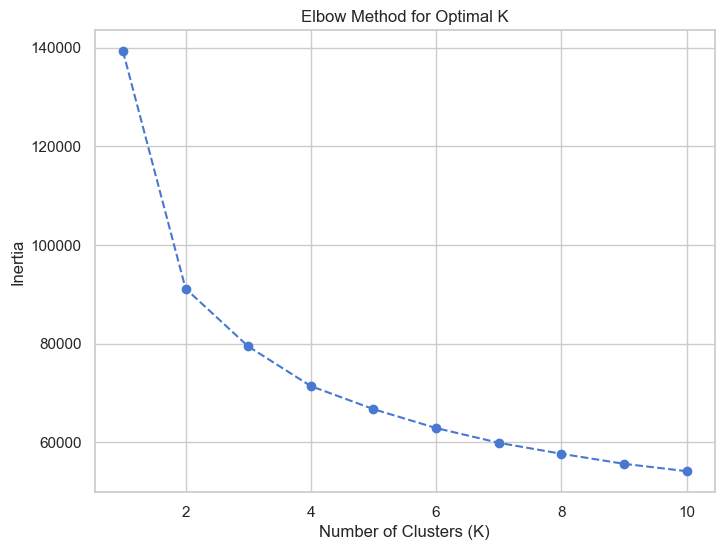

C:\Users\dinod\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0 Size: 3050
Cluster 0 Center: [ 1.13240657 -0.09032181  0.75947437 -0.16641472 -0.16404864  0.12408807
  0.43956622 -0.02366086  0.2218863  -0.02734144]
Cluster 1 Size: 2750
Cluster 1 Center: [-1.30004674  0.15252612 -0.74311941  0.15243636  0.27694545  0.03345455
 -0.68334545 -0.00727273 -0.20916364  0.00669091]
Cluster 2 Size: 2807
Cluster 2 Center: [ 0.01029031  1.24005118  0.34990087  0.16587104  0.41895262  0.55746348
  0.21945137  0.05073032 -0.02593516  0.09091557]
Cluster 3 Size: 2494
Cluster 3 Center: [ 0.13684098  0.14704049 -0.64831402  0.07089014  0.18925421  0.05709703
 -0.64025662 -0.0096231  -0.23223737  0.03656776]
Cluster 4 Size: 2327
Cluster 4 Center: [ 0.50184518  0.04083636  0.50189249  0.20874036  0.22210797 -0.71979434
  0.32973436  0.03907455 -0.36195373  0.13299057]
Cluster 5 Size: 2820
Cluster 5 Center: [-1.27777585 -1.33815686 -0.89308325 -0.12453901 -0.31177305 -0.50241135
 -0.74439716 -0.06950355 -0.3551773  -0.01787234]
Cluster 6 Size: 3472
Cluster

In [79]:
# Select the relevant features for clustering
X = dataset_for_kmeans_2016[all_features]
# Create a list to store the inertia (within-cluster sum of squares) values for different K values
inertia = []
# Iterate through different K values (e.g., from 1 to 10) and calculate inertia for each
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
# Plot the inertia values to find the "elbow" point
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()
# Initialize K-means with the selected K value
kmeans = KMeans(n_clusters=10, random_state=0)
# Fit the K-means model to your data
kmeans.fit(X)
# Add cluster labels to your original dataset
dataset_for_kmeans_2016['cluster_labels'] = kmeans.labels_
# Analyze the clusters by examining cluster centroids or other relevant metrics
cluster_centers = kmeans.cluster_centers_
cluster_sizes = dataset_for_kmeans_2016['cluster_labels'].value_counts()
# Explore the characteristics of each cluster and make interpretations
for cluster_label in range(10):
    cluster_data = dataset_for_kmeans_2016[dataset_for_kmeans_2016['cluster_labels'] == cluster_label]
    print(f"Cluster {cluster_label} Size: {cluster_sizes[cluster_label]}")
    print(f"Cluster {cluster_label} Center: {cluster_centers[cluster_label]}")
silhouette_avg = silhouette_score(dataset_for_kmeans_2016[all_features], dataset_for_kmeans_2016['cluster_labels'])
print(f"Silhouette Score 2016: {silhouette_avg}")

C:\Users\dinod\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dinod\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dinod\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dinod\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dinod\anaconda3\lib\site-packages\sklearn\clust

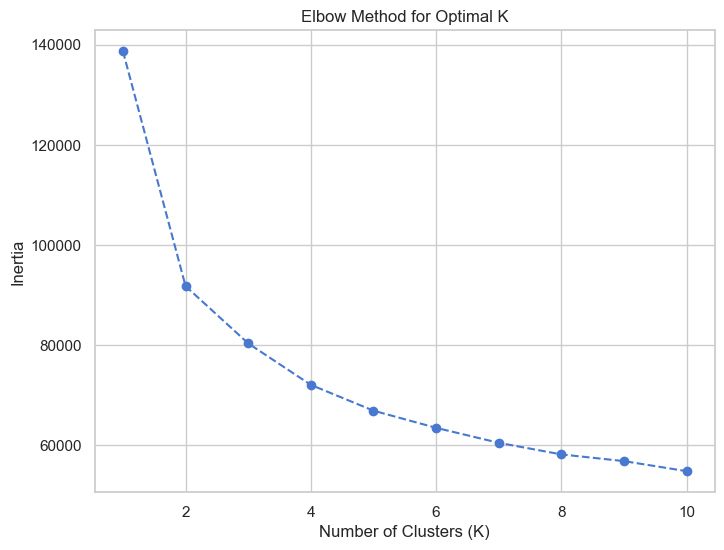

C:\Users\dinod\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0 Size: 2897
Cluster 0 Center: [ 0.05725011 -1.2727376  -0.4182722  -0.14166379 -0.41394546 -0.50120815
 -0.58405247 -0.06544701 -0.34932689 -0.02678633]
Cluster 1 Size: 2488
Cluster 1 Center: [ 0.64939173 -0.17847477  0.56525116  0.09742765  0.08713826 -0.74919614
  0.3170418   0.02347267 -0.18231511  0.09228296]
Cluster 2 Size: 2534
Cluster 2 Center: [-0.23791311  1.24488466  0.45781761  0.1629045   0.38074191  0.49913181
  0.36906077  0.05872139  0.01073402  0.07198106]
Cluster 3 Size: 3141
Cluster 3 Center: [-0.25082871 -0.04586439  0.32756841 -0.10315186 -0.14110156  0.28449538
  0.12301815 -0.00458453  0.11410379 -0.0127348 ]
Cluster 4 Size: 1094
Cluster 4 Center: [-1.75346702e+00 -1.53570494e+00 -2.52624184e+00  1.46252285e-03
 -1.93784278e-01 -4.58500914e-01 -7.88299817e-01 -1.60877514e-01
 -5.68921389e-01  2.48628885e-02]
Cluster 5 Size: 2927
Cluster 5 Center: [ 1.11223002 -0.06990236  0.76143615 -0.14923129 -0.16043731  0.26539119
  0.35449265 -0.00929279  0.20662795 

In [80]:
# Select the relevant features for clustering
X = dataset_for_kmeans_2017[all_features]
# Create a list to store the inertia (within-cluster sum of squares) values for different K values
inertia = []
# Iterate through different K values (e.g., from 1 to 10) and calculate inertia for each
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
# Plot the inertia values to find the "elbow" point
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()
# Initialize K-means with the selected K value
kmeans = KMeans(n_clusters=10, random_state=0)
# Fit the K-means model to your data
kmeans.fit(X)
# Add cluster labels to your original dataset
dataset_for_kmeans_2017['cluster_labels'] = kmeans.labels_
# Analyze the clusters by examining cluster centroids or other relevant metrics
cluster_centers = kmeans.cluster_centers_
cluster_sizes = dataset_for_kmeans_2017['cluster_labels'].value_counts()
# Explore the characteristics of each cluster and make interpretations
for cluster_label in range(10):
    cluster_data = dataset_for_kmeans_2017[dataset_for_kmeans_2017['cluster_labels'] == cluster_label]
    print(f"Cluster {cluster_label} Size: {cluster_sizes[cluster_label]}")
    print(f"Cluster {cluster_label} Center: {cluster_centers[cluster_label]}")
silhouette_avg = silhouette_score(dataset_for_kmeans_2017[all_features], dataset_for_kmeans_2017['cluster_labels'])
print(f"Silhouette Score 2017: {silhouette_avg}")

C:\Users\dinod\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dinod\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dinod\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dinod\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dinod\anaconda3\lib\site-packages\sklearn\clust

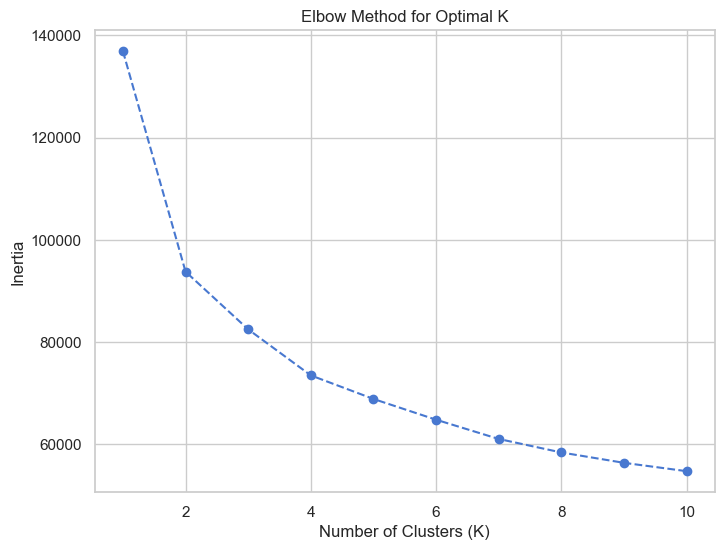

C:\Users\dinod\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0 Size: 2596
Cluster 0 Center: [-0.03659802 -0.01468699 -0.03676485  0.0779661   0.64437596 -0.68197227
 -0.28906009 -0.02465331 -0.17134052  0.04776579]
Cluster 1 Size: 2141
Cluster 1 Center: [-1.53283397e+00 -1.40054179e+00 -1.80027715e+00  1.12097151e-03
 -6.20270901e-01 -4.58851004e-01 -7.64128912e-01 -1.43858010e-01
 -5.66837926e-01  6.35217188e-02]
Cluster 2 Size: 2293
Cluster 2 Center: [ 0.64261731  0.28043349  0.72576477 -0.03105102 -0.66567815  0.70684693
  0.43645879  0.00907109  0.14967292  0.08477976]
Cluster 3 Size: 2364
Cluster 3 Center: [-0.26499131 -0.38560312 -0.2328444  -0.1035533  -0.64602369  0.71912014
 -0.44873096 -0.04094755 -0.19052453  0.0856176 ]
Cluster 4 Size: 2773
Cluster 4 Center: [1.35494426 1.22677273 1.19379762 0.05741075 0.53919942 0.62834475
 0.67248467 0.00952038 0.25791561 0.04789037]
Cluster 5 Size: 1681
Cluster 5 Center: [-1.25641828 -0.69653726 -1.1090847  -0.05663296  0.56680547 -0.70005949
 -0.75907198 -0.01427722 -0.30743605  0.0256989

In [81]:
# Select the relevant features for clustering
X = dataset_for_kmeans_2018[all_features]
# Create a list to store the inertia (within-cluster sum of squares) values for different K values
inertia = []
# Iterate through different K values (e.g., from 1 to 10) and calculate inertia for each
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
# Plot the inertia values to find the "elbow" point
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()
# Initialize K-means with the selected K value
kmeans = KMeans(n_clusters=10, random_state=0)
# Fit the K-means model to your data
kmeans.fit(X)
# Add cluster labels to your original dataset
dataset_for_kmeans_2018['cluster_labels'] = kmeans.labels_
# Analyze the clusters by examining cluster centroids or other relevant metrics
cluster_centers = kmeans.cluster_centers_
cluster_sizes = dataset_for_kmeans_2018['cluster_labels'].value_counts()
# Explore the characteristics of each cluster and make interpretations
for cluster_label in range(10):
    cluster_data = dataset_for_kmeans_2018[dataset_for_kmeans_2018['cluster_labels'] == cluster_label]
    print(f"Cluster {cluster_label} Size: {cluster_sizes[cluster_label]}")
    print(f"Cluster {cluster_label} Center: {cluster_centers[cluster_label]}")
silhouette_avg = silhouette_score(dataset_for_kmeans_2018[all_features], dataset_for_kmeans_2018['cluster_labels'])
print(f"Silhouette Score 2018: {silhouette_avg}")

C:\Users\dinod\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dinod\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dinod\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dinod\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dinod\anaconda3\lib\site-packages\sklearn\clust

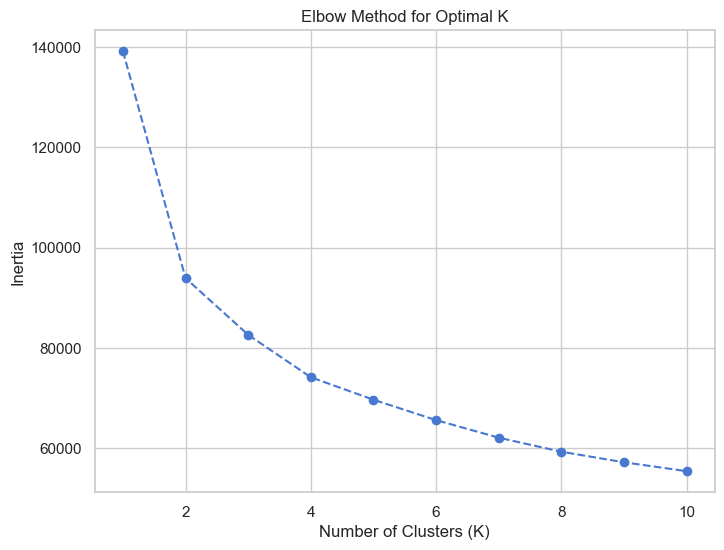

C:\Users\dinod\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0 Size: 3123
Cluster 0 Center: [-0.05369414  1.10243843  0.44720125  0.0504643   0.65244957  0.70035223
  0.2571886   0.02689721  0.093756    0.07941082]
Cluster 1 Size: 2114
Cluster 1 Center: [-0.63237701  0.30473601 -0.66169636 -0.09725639  0.64257332  0.72242195
 -0.59299905 -0.03859981 -0.39886471  0.059035  ]
Cluster 2 Size: 2594
Cluster 2 Center: [-1.02003258 -1.25993441 -1.00199352 -0.0212963  -0.63919753 -0.60493827
 -0.72777778 -0.08425926 -0.50555556  0.05617284]
Cluster 3 Size: 3286
Cluster 3 Center: [1.28919621 1.18244768 1.10947821 0.02264151 0.6042605  0.66682897
 0.60499087 0.03870968 0.22860621 0.02629337]
Cluster 4 Size: 2864
Cluster 4 Center: [ 0.26516459 -0.94601431  0.098158    0.0150838  -0.6603352  -0.71955307
 -0.16173184 -0.05837989 -0.3103352  -0.05530726]
Cluster 5 Size: 2874
Cluster 5 Center: [-0.16718149 -0.28080055 -0.19654158 -0.10354906 -0.59846903  0.68643006
 -0.34878219 -0.04175365 -0.23827418  0.04231037]
Cluster 6 Size: 2754
Cluster 6 Center:

In [82]:
# Select the relevant features for clustering
X = dataset_for_kmeans_2019[all_features]
# Create a list to store the inertia (within-cluster sum of squares) values for different K values
inertia = []
# Iterate through different K values (e.g., from 1 to 10) and calculate inertia for each
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
# Plot the inertia values to find the "elbow" point
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()
# Initialize K-means with the selected K value
kmeans = KMeans(n_clusters=10, random_state=0)
# Fit the K-means model to your data
kmeans.fit(X)
# Add cluster labels to your original dataset
dataset_for_kmeans_2019['cluster_labels'] = kmeans.labels_
# Analyze the clusters by examining cluster centroids or other relevant metrics
cluster_centers = kmeans.cluster_centers_
cluster_sizes = dataset_for_kmeans_2019['cluster_labels'].value_counts()
# Explore the characteristics of each cluster and make interpretations
for cluster_label in range(10):
    cluster_data = dataset_for_kmeans_2019[dataset_for_kmeans_2019['cluster_labels'] == cluster_label]
    print(f"Cluster {cluster_label} Size: {cluster_sizes[cluster_label]}")
    print(f"Cluster {cluster_label} Center: {cluster_centers[cluster_label]}")
silhouette_avg = silhouette_score(dataset_for_kmeans_2019[all_features], dataset_for_kmeans_2019['cluster_labels'])
print(f"Silhouette Score 2019: {silhouette_avg}")

C:\Users\dinod\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dinod\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dinod\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dinod\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dinod\anaconda3\lib\site-packages\sklearn\clust

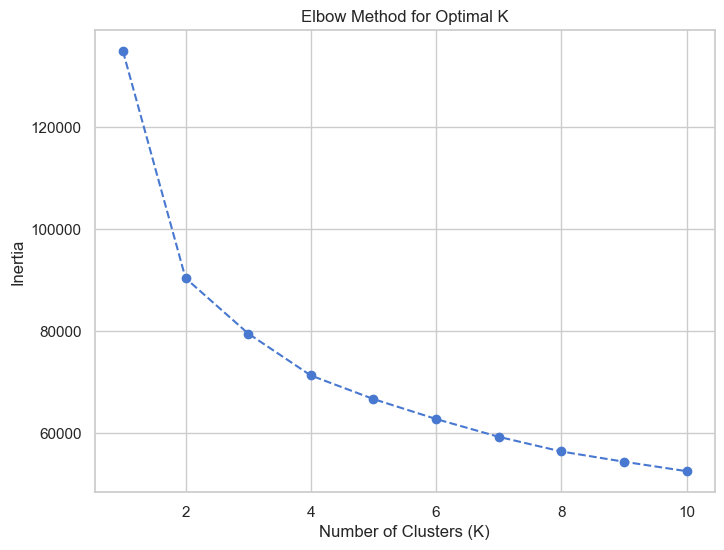

C:\Users\dinod\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0 Size: 3255
Cluster 0 Center: [1.32469333 1.19529984 1.10867672 0.04937059 0.57009518 0.63223826
 0.59883328 0.01105312 0.17513049 0.01252687]
Cluster 1 Size: 2403
Cluster 1 Center: [ 0.23891137 -0.97324887  0.10937262 -0.00832293 -0.63121099 -0.74706617
 -0.13116937 -0.07290886 -0.32825635 -0.00865585]
Cluster 2 Size: 2486
Cluster 2 Center: [-0.26198419 -0.36250556 -0.3470168  -0.07073955 -0.62025723  0.6903537
 -0.46205788 -0.04405145 -0.33376206  0.0221865 ]
Cluster 3 Size: 2921
Cluster 3 Center: [ 0.64907923  0.12341005  0.59080422 -0.01205067  0.65539199 -0.6217049
  0.27853475 -0.01150291  0.03642588 -0.0219103 ]
Cluster 4 Size: 2053
Cluster 4 Center: [-0.60634863  0.41650706 -0.70703072 -0.01670714  0.64769305  0.72268091
 -0.60106848 -0.07615347 -0.28712967  0.01359883]
Cluster 5 Size: 2497
Cluster 5 Center: [-0.95754702 -1.35772658 -1.06787787 -0.04229075 -0.66159391 -0.61738086
 -0.73784541 -0.0659992  -0.52671205  0.01601922]
Cluster 6 Size: 2275
Cluster 6 Center: [

In [83]:
# Select the relevant features for clustering
X = dataset_for_kmeans_2020[all_features]
# Create a list to store the inertia (within-cluster sum of squares) values for different K values
inertia = []
# Iterate through different K values (e.g., from 1 to 10) and calculate inertia for each
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
# Plot the inertia values to find the "elbow" point
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()
# Initialize K-means with the selected K value
kmeans = KMeans(n_clusters=10, random_state=0)
# Fit the K-means model to your data
kmeans.fit(X)
# Add cluster labels to your original dataset
dataset_for_kmeans_2020['cluster_labels'] = kmeans.labels_
# Analyze the clusters by examining cluster centroids or other relevant metrics
cluster_centers = kmeans.cluster_centers_
cluster_sizes = dataset_for_kmeans_2020['cluster_labels'].value_counts()
# Explore the characteristics of each cluster and make interpretations
for cluster_label in range(10):
    cluster_data = dataset_for_kmeans_2020[dataset_for_kmeans_2020['cluster_labels'] == cluster_label]
    print(f"Cluster {cluster_label} Size: {cluster_sizes[cluster_label]}")
    print(f"Cluster {cluster_label} Center: {cluster_centers[cluster_label]}")
silhouette_avg = silhouette_score(dataset_for_kmeans_2020[all_features], dataset_for_kmeans_2020['cluster_labels'])
print(f"Silhouette Score 2020: {silhouette_avg}")

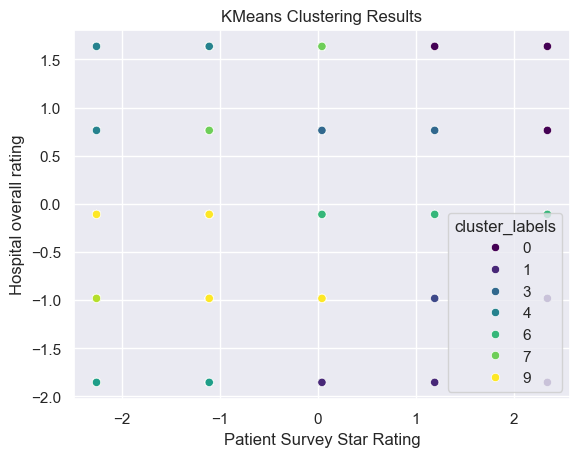

In [84]:
sns.set(style="darkgrid")
sns.scatterplot(x=dataset_for_kmeans_2020['Patient Survey Star Rating'], y=dataset_for_kmeans_2020['Hospital overall rating'],
                hue=dataset_for_kmeans_2020['cluster_labels'], palette='viridis')
plt.title('KMeans Clustering Results')
plt.xlabel('Patient Survey Star Rating')
plt.ylabel('Hospital overall rating')
plt.show()

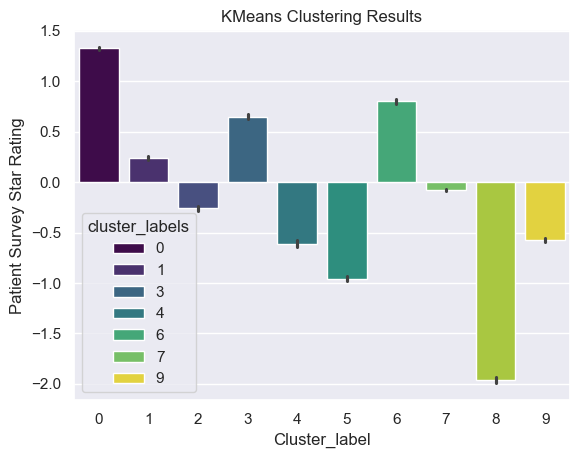

In [85]:
sorted_dataset_2020 = dataset_for_kmeans_2020.sort_values(by='cluster_labels')
sns.barplot(x='cluster_labels', y='Patient Survey Star Rating', data=sorted_dataset_2020, hue='cluster_labels', palette='viridis')
plt.title('KMeans Clustering Results')
plt.xlabel('Cluster_label')
plt.ylabel('Patient Survey Star Rating')
plt.show()

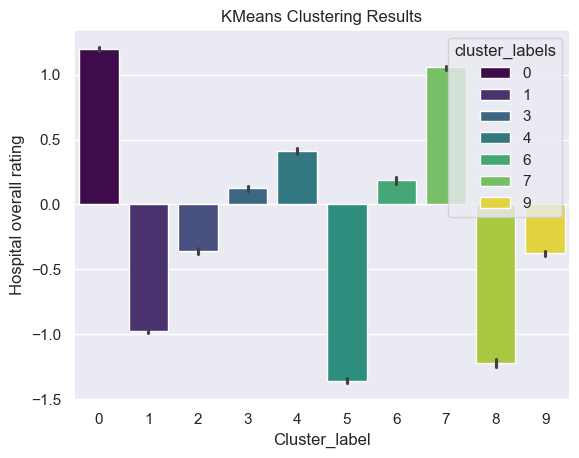

In [86]:
sorted_dataset_2020 = dataset_for_kmeans_2020.sort_values(by='cluster_labels')
sns.barplot(x='cluster_labels', y='Hospital overall rating', data=sorted_dataset_2020, hue='cluster_labels', palette='viridis')
plt.title('KMeans Clustering Results')
plt.xlabel('Cluster_label')
plt.ylabel('Hospital overall rating')
plt.show()

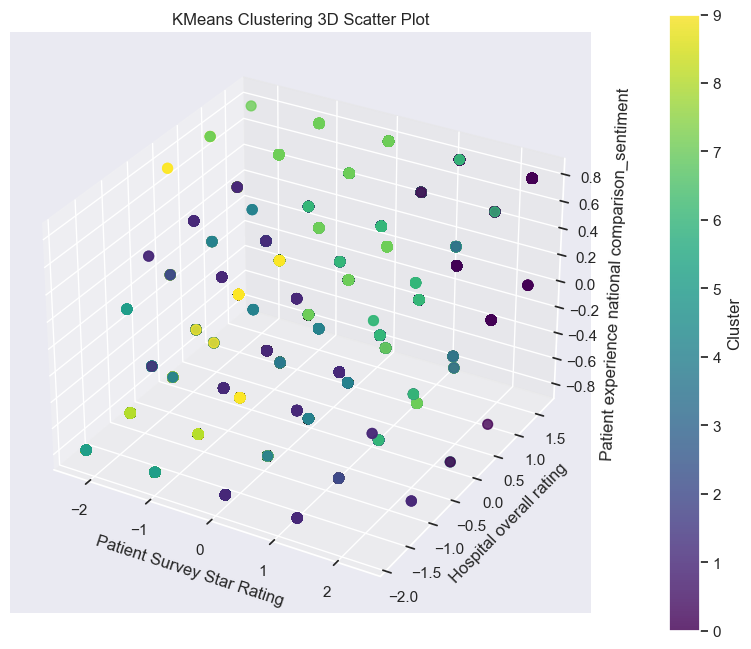

In [87]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# Scatter plot with different colors for each cluster
scatter = ax.scatter(sorted_dataset_2020['Patient Survey Star Rating'], sorted_dataset_2020['Hospital overall rating'], 
                     sorted_dataset_2020['Patient experience national comparison_sentiment'],
                     c=sorted_dataset_2020['cluster_labels'], cmap='viridis', s=50, alpha=0.8)

ax.set_xlabel('Patient Survey Star Rating')
ax.set_ylabel('Hospital overall rating')
ax.set_zlabel('Patient experience national comparison_sentiment')

# Adding a colorbar to the right of the plot
colorbar = plt.colorbar(scatter, ax=ax, pad=0.1)
colorbar.set_label('Cluster')
plt.title('KMeans Clustering 3D Scatter Plot')
plt.show()

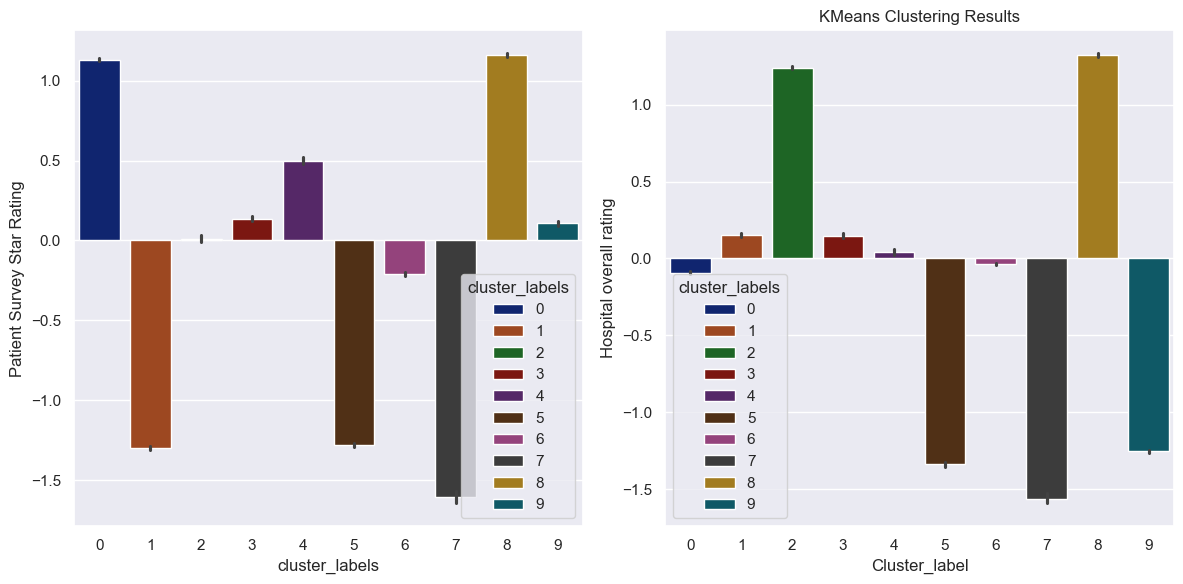

In [98]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sorted_dataset_2016 = dataset_for_kmeans_2016.sort_values(by='cluster_labels')
sns.barplot(x='cluster_labels', y='Patient Survey Star Rating', data=sorted_dataset_2016, hue='cluster_labels', palette='dark', ax=axes[0])
plt.title('KMeans Clustering Results')
plt.xlabel('Cluster_label')
plt.ylabel('Patient Survey Star Rating')

sns.barplot(x='cluster_labels', y='Hospital overall rating', data=sorted_dataset_2016, hue='cluster_labels', palette='dark', ax=axes[1])
plt.title('KMeans Clustering Results')
plt.xlabel('Cluster_label')
plt.ylabel('Hospital overall rating')

plt.tight_layout()
plt.show()

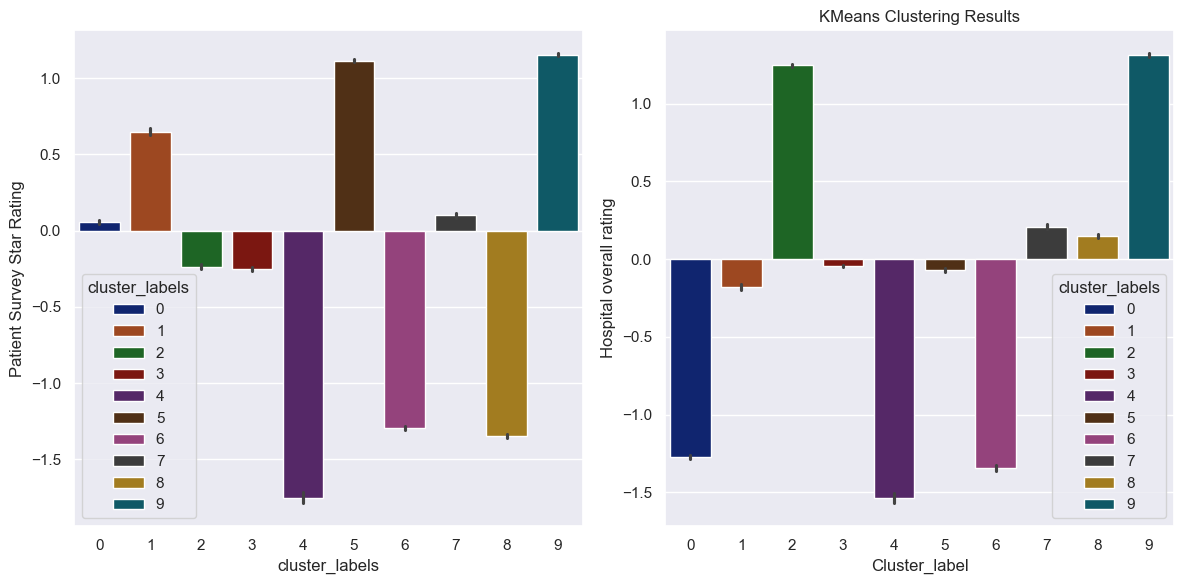

In [99]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sorted_dataset_2017 = dataset_for_kmeans_2017.sort_values(by='cluster_labels')
sns.barplot(x='cluster_labels', y='Patient Survey Star Rating', data=sorted_dataset_2017, hue='cluster_labels', palette='dark', ax=axes[0])
plt.title('KMeans Clustering Results')
plt.xlabel('Cluster_label')
plt.ylabel('Patient Survey Star Rating')

sns.barplot(x='cluster_labels', y='Hospital overall rating', data=sorted_dataset_2017, hue='cluster_labels', palette='dark', ax=axes[1])
plt.title('KMeans Clustering Results')
plt.xlabel('Cluster_label')
plt.ylabel('Hospital overall rating')

plt.tight_layout()
plt.show()

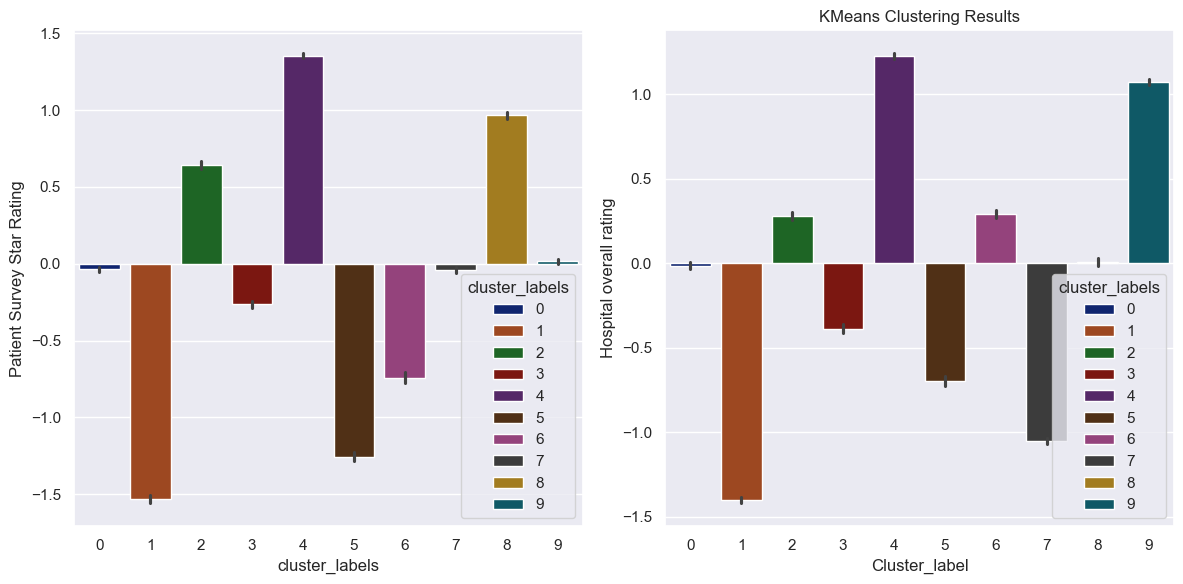

In [100]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sorted_dataset_2018 = dataset_for_kmeans_2018.sort_values(by='cluster_labels')
sns.barplot(x='cluster_labels', y='Patient Survey Star Rating', data=sorted_dataset_2018, hue='cluster_labels', palette='dark', ax=axes[0])
plt.title('KMeans Clustering Results')
plt.xlabel('Cluster_label')
plt.ylabel('Patient Survey Star Rating')

sns.barplot(x='cluster_labels', y='Hospital overall rating', data=sorted_dataset_2018, hue='cluster_labels', palette='dark', ax=axes[1])
plt.title('KMeans Clustering Results')
plt.xlabel('Cluster_label')
plt.ylabel('Hospital overall rating')

plt.tight_layout()
plt.show()

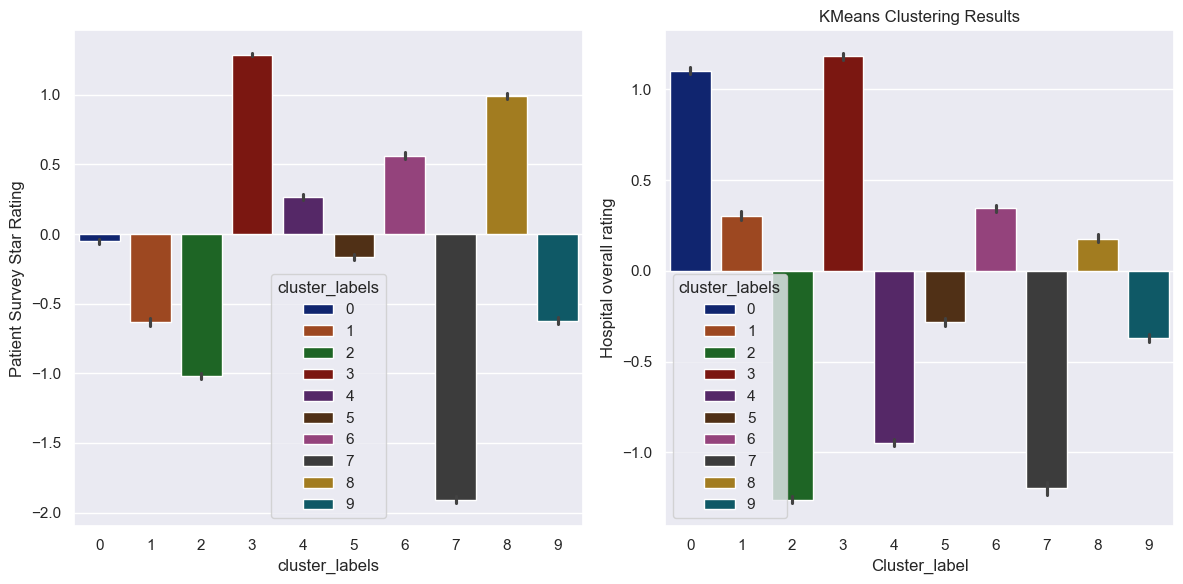

In [101]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sorted_dataset_2019 = dataset_for_kmeans_2019.sort_values(by='cluster_labels')
sns.barplot(x='cluster_labels', y='Patient Survey Star Rating', data=sorted_dataset_2019, hue='cluster_labels', palette='dark', ax=axes[0])
plt.title('KMeans Clustering Results')
plt.xlabel('Cluster_label')
plt.ylabel('Patient Survey Star Rating')

sns.barplot(x='cluster_labels', y='Hospital overall rating', data=sorted_dataset_2019, hue='cluster_labels', palette='dark', ax=axes[1])
plt.title('KMeans Clustering Results')
plt.xlabel('Cluster_label')
plt.ylabel('Hospital overall rating')

plt.tight_layout()
plt.show()

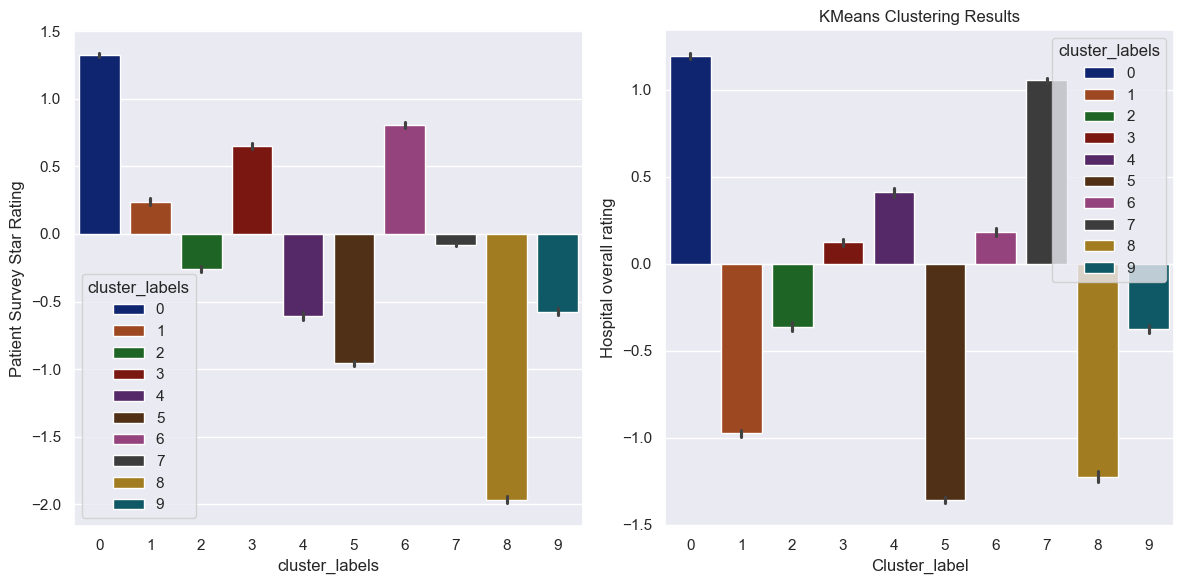

In [102]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sorted_dataset_2020 = dataset_for_kmeans_2020.sort_values(by='cluster_labels')
sns.barplot(x='cluster_labels', y='Patient Survey Star Rating', data=sorted_dataset_2020, hue='cluster_labels', palette='dark', ax=axes[0])
plt.title('KMeans Clustering Results')
plt.xlabel('Cluster_label')
plt.ylabel('Patient Survey Star Rating')

sns.barplot(x='cluster_labels', y='Hospital overall rating', data=sorted_dataset_2020, hue='cluster_labels', palette='dark', ax=axes[1])
plt.title('KMeans Clustering Results')
plt.xlabel('Cluster_label')
plt.ylabel('Hospital overall rating')

plt.tight_layout()
plt.show()